# Descripcion

fuente dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Este dataset contiene datos históricos de ventas de un supermercado registrado en tres
sucursales diferentes durante un período de tres meses. Las columnas incluyen información
sobre la sucursal, el tipo de cliente, la categoría de producto, el precio unitario, la cantidad
comprada, el método de pago, entre otros.

Información de los Atributos
- Invoice id: Identificación única generada por computadora para cada factura de venta.
- Branch: Sucursal del supermercado (hay 3 sucursales disponibles, identificadas como A, B y C).
- City: Ubicación de las sucursales.
- Customer type: Tipo de cliente, clasificado como Miembro (para aquellos que usan tarjeta de membresía) y Normal
(sin membresía).
- Gender: Género del cliente.
- Product line: Categoría general del producto, que incluye: Accesorios electrónicos, Accesorios de moda, Alimentos
y bebidas, Salud y belleza, Hogar y estilo de vida, Deportes y viajes.
- Unit price: Precio de cada producto en dólares.
- Quantity: Cantidad de productos comprados por el cliente.
- Tax: Impuesto del 5% aplicado a la compra.
- Total: Precio total incluyendo el impuesto.
- Date: Fecha de la compra (con registros disponibles desde enero de 2019 hasta marzo de 2019).
- Time: Hora de la compra (entre las 10:00 a.m. y las 9:00 p.m.).
- Payment: Método de pago utilizado por el cliente para la compra (con tres opciones disponibles: Efectivo, Tarjeta de
crédito, y Ewallet).
- COGS (Cost of Goods Sold): Costo de los bienes vendidos.
- Gross margin percentage: Porcentaje de margen bruto.
- Gross income: Ingreso bruto.
- Rating: Calificación del cliente sobre su experiencia de compra en una escala de 1 a 10


# Parte 1 Exploración y Limpieza de Datos

## a) Carga de datos

In [891]:
#Cargamos los datos en un dataframe
import pandas as pd
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [892]:
#visualizamos el df para tener una idea de las features (columnas)
df.head()


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [893]:
#imprimimos todas las columans del df
df.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## b) Limpieza de datos

En este seccion haremos lo siguiente para mejorar la calidad de nuestros datos:
- Identificar y maneja valores faltantes o inconsistentes.
- Asegurarse de que todos los tipos de datos sean correctos (por ejemplo,
fechas en formato adecuado, valores numéricos correctamente tipificados).
- Corriguir cualquier error de formato o outliers en las variables críticas.

In [894]:
# Identificación de valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes en cada columna:\n", missing_values)


Valores faltantes en cada columna:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [895]:
# Verificación de tipos de datos
data_types = df.dtypes
print("\nTipos de datos de cada columna:\n", data_types)

# Convertir 'Date' a datetime si no lo está
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Verificar si hay otras columnas que necesiten conversión
# En este caso no



Tipos de datos de cada columna:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [896]:
# Si hay pocos valores faltantes, se pueden eliminar
df= df.dropna()

# Tambien se puede  imputar los valores faltantes (por ejemplo, usando la media)
# df['Column_Name'] = df['Column_Name'].fillna(df['Column_Name'].mean())


In [897]:
""""
#Para correguir outliers podriamos usar lo siguiente, pero no lo aplicaremos en este analisis ya que queremos ver todas las ventas

# Identificación de outliers en 'Total' usando el método del IQR
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers (mantiene solo los valors que no son outliers)
df_outliers_removed = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]
# Filtrar outliers (mantener solo los valores que son outliers)
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]

print(f"Valores fuera de {lower_bound} y {upper_bound} son considerados outliers y se han eliminado.")
"""


'"\n#Para correguir outliers podriamos usar lo siguiente, pero no lo aplicaremos en este analisis ya que queremos ver todas las ventas\n\n# Identificación de outliers en \'Total\' usando el método del IQR\nQ1 = df[\'Total\'].quantile(0.25)\nQ3 = df[\'Total\'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Definir límites\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Filtrar outliers (mantiene solo los valors que no son outliers)\ndf_outliers_removed = df[(df[\'Total\'] >= lower_bound) & (df[\'Total\'] <= upper_bound)]\n# Filtrar outliers (mantener solo los valores que son outliers)\noutliers = df[(df[\'Total\'] < lower_bound) | (df[\'Total\'] > upper_bound)]\n\nprint(f"Valores fuera de {lower_bound} y {upper_bound} son considerados outliers y se han eliminado.")\n'

## c) Exploracion Inicial
Analisis exploratorio de variables, aqui haremos lo siguiente
- Resumen estadistico de variables principales.
- Visualizacion de la distribucion de ingresos (TOTAL) y la cantidad de productos vendidos.

In [898]:
# Resumen estadístico de las variables principales
summary_stats = df[['Unit price', 'Quantity', 'Total']].describe()
print(summary_stats)


        Unit price     Quantity        Total
count  1000.000000  1000.000000  1000.000000
mean     55.672130     5.510000   322.966749
std      26.494628     2.923431   245.885335
min      10.080000     1.000000    10.678500
25%      32.875000     3.000000   124.422375
50%      55.230000     5.000000   253.848000
75%      77.935000     8.000000   471.350250
max      99.960000    10.000000  1042.650000


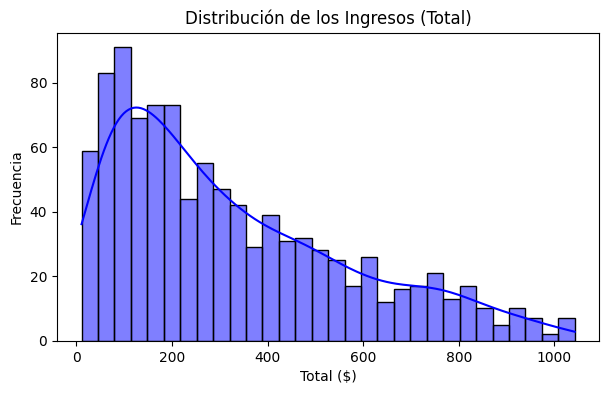

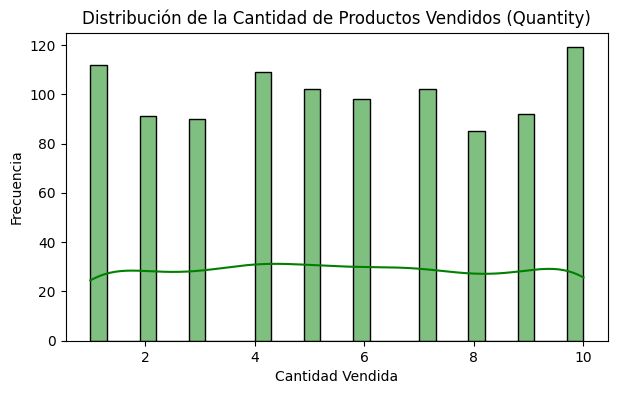

In [899]:
#Visualizacion 

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de Total
plt.figure(figsize=(7, 4))
sns.histplot(df['Total'], kde=True, bins=30, color='blue')
plt.title('Distribución de los Ingresos (Total)')
plt.xlabel('Total ($)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Quantity
plt.figure(figsize=(7, 4))
sns.histplot(df['Quantity'], kde=True, bins=30, color='green')
plt.title('Distribución de la Cantidad de Productos Vendidos (Quantity)')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.show()


# Parte 2 Análisis Exploratorio de Datos (EDA)
En esta sección, profundizare en los datos para identificar patrones, correlaciones y
posibles insights que puedan ayudar a mejorar la gestión de las ventas en el supermercado.

## a) Análisis de ventas por sucursal y categoría de producto:


Ventas Totales por Branch (Ordenadas de Mayor a Menor):
  Branch        Total
2      C  110568.7065
0      A  106200.3705
1      B  106197.6720

La sucursal con mayores ventas es la sucursal C con un total de ventas de $110568.71.


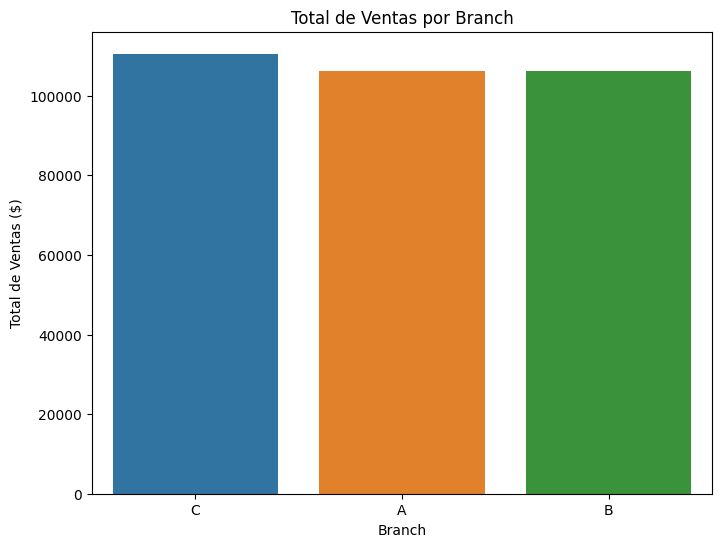

In [900]:
# Total de ventas por Branch
total_by_branch = df.groupby('Branch')['Total'].sum().reset_index()

# Ordenar los datos por total de ventas en orden descendente
sorted_total_by_branch = total_by_branch.sort_values(by='Total', ascending=False)

# Mostrar los resultados ordenados
print("Ventas Totales por Branch (Ordenadas de Mayor a Menor):")
print(sorted_total_by_branch)

# Obtener el Branch con mayores ventas
max_branch_sales = sorted_total_by_branch.iloc[0]
print(f"\nLa sucursal con mayores ventas es la sucursal {max_branch_sales['Branch']} "
      f"con un total de ventas de ${max_branch_sales['Total']:.2f}.")

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Total', data=sorted_total_by_branch, hue='Branch',legend=False)
plt.title('Total de Ventas por Branch')
plt.xlabel('Branch')
plt.ylabel('Total de Ventas ($)')
plt.show()


Ventas Totales por Branch y Product Line (Ordenadas de Mayor a Menor):
   Branch            Product line       Total
14      C      Food and beverages  23766.8550
4       A      Home and lifestyle  22417.1955
13      C     Fashion accessories  21560.0700
11      B       Sports and travel  19988.1990
9       B       Health and beauty  19980.6600
5       A       Sports and travel  19372.6995
12      C  Electronic accessories  18968.9745
0       A  Electronic accessories  18317.1135
10      B      Home and lifestyle  17549.1645
2       A      Food and beverages  17163.1005
6       B  Electronic accessories  17051.4435
15      C       Health and beauty  16615.3260
7       B     Fashion accessories  16413.3165
1       A     Fashion accessories  16332.5085
17      C       Sports and travel  15761.9280
8       B      Food and beverages  15214.8885
16      C      Home and lifestyle  13895.5530
3       A       Health and beauty  12597.7530

La combinación con mayores ventas es la sucursal C con

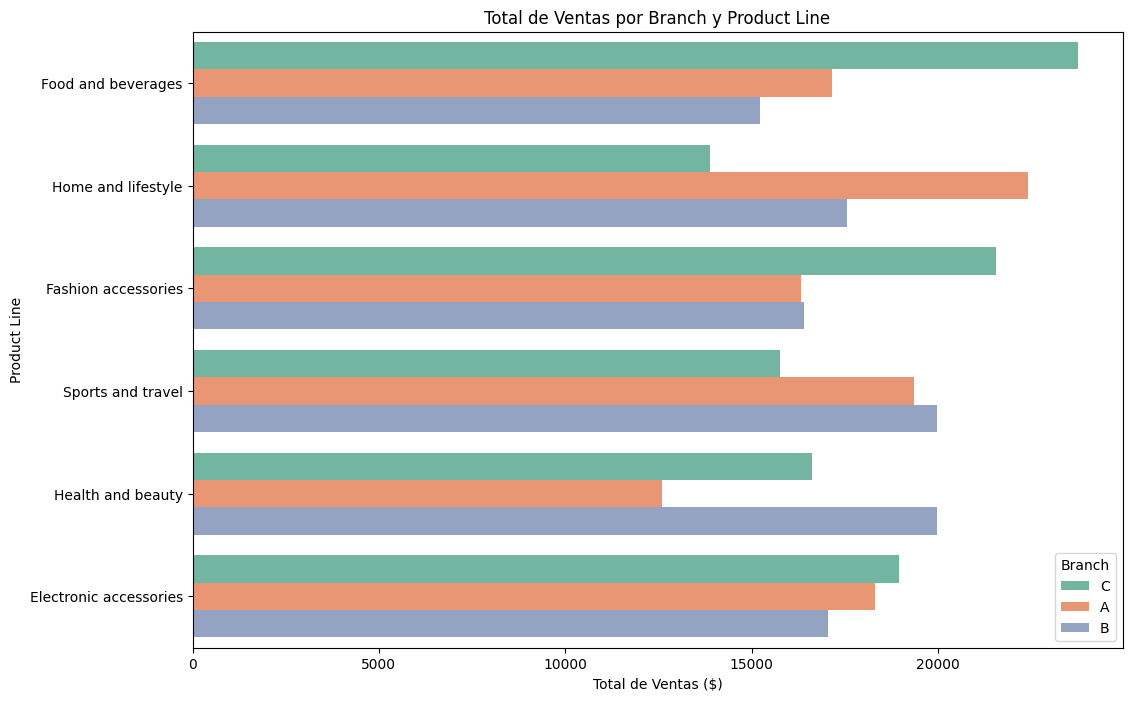

In [901]:
# Agrupación por Branch y Product line, sumando las ventas
sales_by_branch_product_line = df.groupby(['Branch', 'Product line'])['Total'].sum().reset_index()

# Ordenar los datos por ventas totales en orden descendente
sorted_sales = sales_by_branch_product_line.sort_values(by='Total', ascending=False)

# Mostrar los resultados ordenados
print("Ventas Totales por Branch y Product Line (Ordenadas de Mayor a Menor):")
print(sorted_sales)

# Obtener el Branch y Product line con mayores ventas
max_sales = sorted_sales.iloc[0]
print(f"\nLa combinación con mayores ventas es la sucursal {max_sales['Branch']} "
      f"con la categoría {max_sales['Product line']} generando un total de ${max_sales['Total']:.2f}.")

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Product line', hue='Branch', data=sorted_sales, palette='Set2')
plt.title('Total de Ventas por Branch y Product Line')
plt.xlabel('Total de Ventas ($)')
plt.ylabel('Product Line')
plt.show()


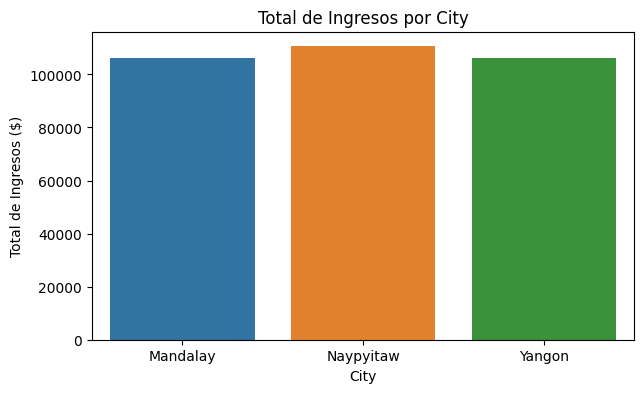

In [902]:
# Total de ventas por City
total_by_city = df.groupby('City')['Total'].sum().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(x='City', y='Total', data=total_by_city, hue='City',legend=False)
plt.title('Total de Ingresos por City')
plt.xlabel('City')
plt.ylabel('Total de Ingresos ($)')
plt.show()


## b) Tendencias en el tiempo:
- Analizaremos cómo han cambiado las ventas a lo largo del tiempo (por ejemplo,
ventas por día o por hora). Identificar tendencias que puedan ser relevantes
para la planificación estratégica

El período de ventas en el dataset va desde 2019-01-01 00:00:00 hasta 2019-03-30 00:00:00.
La duración total del período de ventas es de 88 días.


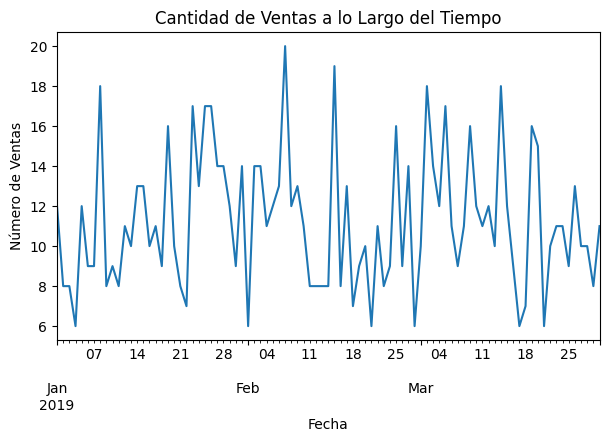

In [903]:
# vamos a investigar el periodo de ventas del df
# Convertir la columna Date a formato datetime (si no está ya convertida)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Encontrar la primera y última fecha de ventas
first_date = df['Date'].min()
last_date = df['Date'].max()

print(f"El período de ventas en el dataset va desde {first_date} hasta {last_date}.")

# Calcular la duración del período de ventas
period_duration = last_date - first_date

print(f"La duración total del período de ventas es de {period_duration.days} días.")

# Grafico de la cantidad de ventas a lo largo del tiempo
sales_over_time = df.groupby('Date').size()

plt.figure(figsize=(7, 4))
sales_over_time.plot()
plt.title('Cantidad de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Ventas')
plt.show()



<Figure size 700x400 with 0 Axes>

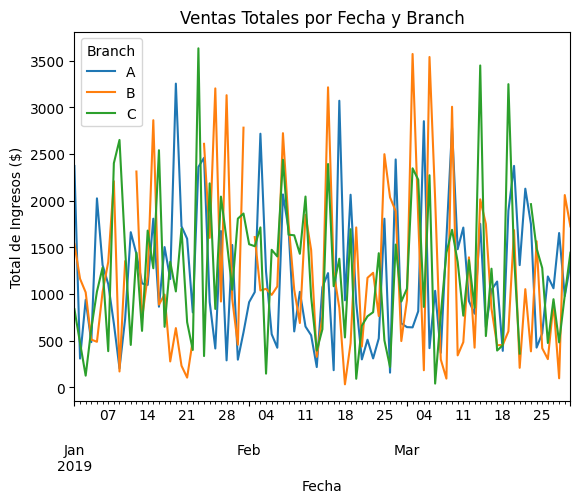

In [904]:


# Total de ventas por fecha y sucursal
sales_by_date_branch = df.groupby(['Date', 'Branch'])['Total'].sum().unstack()

plt.figure(figsize=(7, 4))
sales_by_date_branch.plot()
plt.title('Ventas Totales por Fecha y Branch')
plt.xlabel('Fecha')
plt.ylabel('Total de Ingresos ($)')
plt.legend(title='Branch')
plt.show()


Podemos agrupar las ventas por día y visualizar cómo varían con el tiempo.



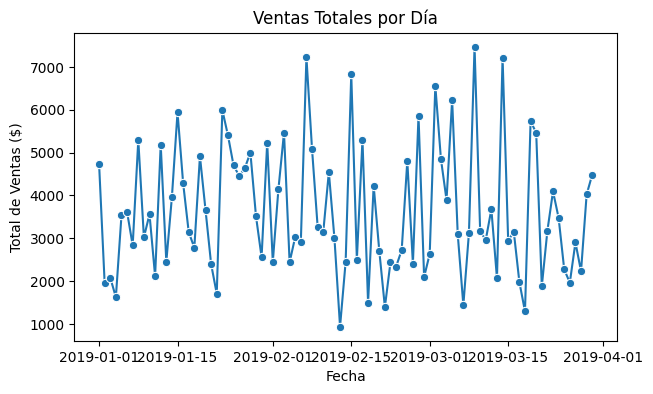

In [905]:
# Agrupación de las ventas por día
sales_per_day = df.groupby('Date')['Total'].sum().reset_index()

# Visualización de las ventas por día
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.lineplot(x='Date', y='Total', data=sales_per_day, marker='o')
plt.title('Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas ($)')
plt.show()

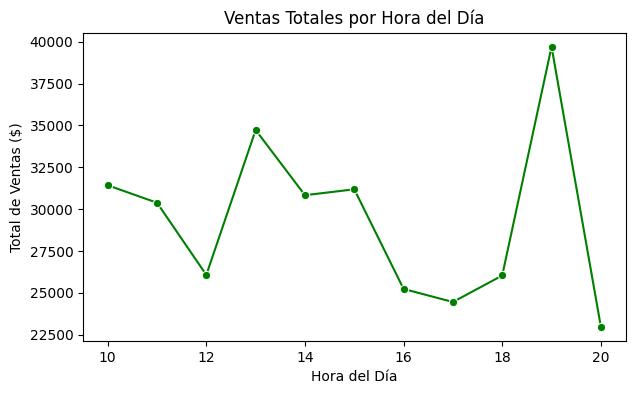

In [906]:
# Agrupación de las ventas por hora del día
# Extraer la hora de la columna 'Time'
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
sales_per_hour = df.groupby('Hour')['Total'].sum().reset_index()

# Visualización de las ventas por hora del día
plt.figure(figsize=(7, 4))
sns.lineplot(x='Hour', y='Total', data=sales_per_hour, marker='o', color='green')
plt.title('Ventas Totales por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Ventas ($)')
plt.show()


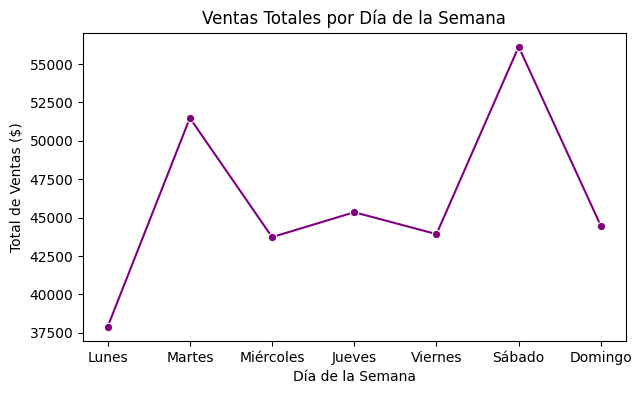

In [907]:
# Extraer el día de la semana de la columna 'Date'
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Lunes=0, Domingo=6

# Agrupación de las ventas por día de la semana
sales_per_day_of_week = df.groupby('DayOfWeek')['Total'].sum().reset_index()

# Visualización de las ventas por día de la semana
plt.figure(figsize=(7, 4))
sns.lineplot(x='DayOfWeek', y='Total', data=sales_per_day_of_week, marker='o', color='purple')
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ventas ($)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()


Horas Pico:

- 19:00: Mayor volumen de ventas. Horario luego del trabajo
- 13:00: Segundo pico de ventas. Posible uso de Hora de colacion de clientes para compras

Días con Más Ventas:

- Sábados: Mayor venta semanal. Normal, las personas compran mas los fines de semana, de preferencia el sabado.
- Martes: Segundo día más fuerte. Poco comun, quiza es una practica comun dentro de la comunidad.

Recomendaciones:

- Refuerza personal a las 19:00, 13:00 y los sábados.
- Ofertas especiales los sábados y martes al mediodía.
- Asegura stock suficiente para las horas pico y fines de semana.

Estas acciones ayudarán a optimizar las operaciones y aumentar las ventas en los períodos clave.

## c) Análisis de comportamiento de los clientes
Analizaremos el comportamiento de los clientes basado en el Customer type
(Miembro vs Normal). Para verificar si hay diferencias significativas en los patrones de
compra entre estos tipos de clientes.

In [908]:
# Agrupar los datos por Customer type y calcular las ventas totales, cantidad promedio comprada y el ticket promedio
customer_type_analysis = df.groupby('Customer type').agg(
    total_sales=('Total', 'sum'),
    avg_quantity=('Quantity', 'mean'),
    avg_ticket=('Total', 'mean')
).reset_index()

# Mostrar el análisis
print(customer_type_analysis)




  Customer type  total_sales  avg_quantity  avg_ticket
0        Member   164223.444      5.558882  327.791305
1        Normal   158743.305      5.460922  318.122856


Ventas Totales por Tipo de Cliente

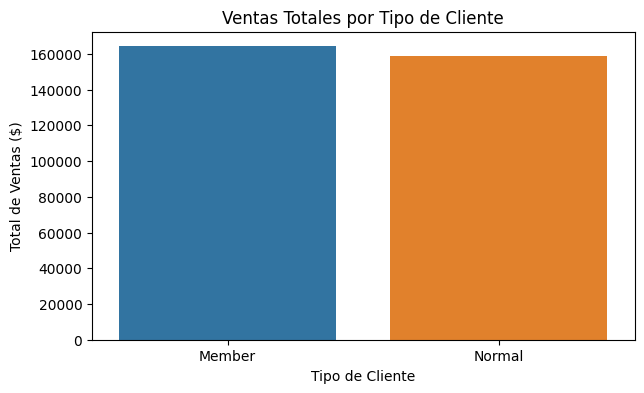

In [909]:


plt.figure(figsize=(7, 4))
sns.barplot(x='Customer type', y='total_sales', data=customer_type_analysis,  hue='Customer type',legend=False)
plt.title('Ventas Totales por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total de Ventas ($)')
plt.show()


Cantidad Promedio Comprada por Tipo de Cliente


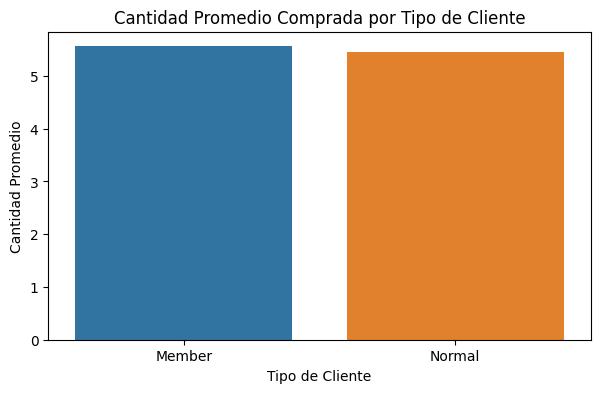

In [910]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Customer type', y='avg_quantity', data=customer_type_analysis, hue='Customer type',legend=False)
plt.title('Cantidad Promedio Comprada por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad Promedio')
plt.show()



Ticket Promedio por Tipo de Cliente

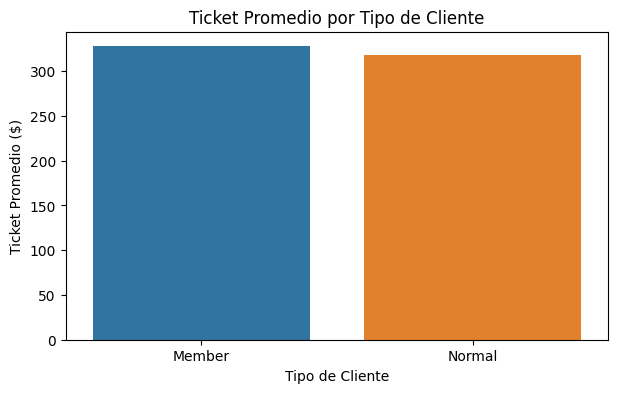

In [911]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Customer type', y='avg_ticket', data=customer_type_analysis, hue='Customer type',legend=False)
plt.title('Ticket Promedio por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ticket Promedio ($)')
plt.show()



Diferencias significativas no hay, pero podemos hacer un par de conlusiones:
- Los miembros son ligeramente más valiosos que los clientes normales: Generan más ventas totales, compran un poco más por transacción, y tienen un ticket promedio más alto.

- Estrategia para aumentar la membresía: Dado que los miembros tienden a gastar más, podría ser beneficioso incentivar a los clientes normales a convertirse en miembros, posiblemente ofreciendo descuentos en la primera compra como miembro o beneficios adicionales.

- Optimización de campañas: Las promociones podrían dirigirse de manera diferente a los dos grupos. Por ejemplo, ofrecer descuentos por volumen podría atraer a los miembros a comprar aún más, mientras que las promociones de valor agregado podrían incentivar a los clientes normales a gastar más por transacción.

# Parte 3: Modelado Predictivo

Construiremos un modelo predictivo que estime las ventas y las futuras basadas en los datos
históricos disponibles.

### a) Preparación de Datos:
- Crea variables adicionales si es necesario (por ejemplo, combinaciones de
Product line y Branch, interacciones entre características, etc.)
- Divide los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80%
entrenamiento, 20% prueba).


In [912]:
from sklearn.model_selection import train_test_split


# --------------------------------------------1. Creación de Variables Adicionales----------------------------------------------

# Combinar 'Product line' y 'Branch'
df['Product_Branch'] = df['Product line'] + '_' + df['Branch']

# Asegurarse de que 'Date' esté en formato datetime, lo hicimos anteriormente pero lo ponemos por si corremos el jupyter desde aqui
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extraer características temporales, algunos de estos ya los hicimos en la parte 2, pero se vuelve a hacer para preservar orden
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Lunes=0, Domingo=6

# Extraer la hora de la columna 'Time'
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Crear interacciones entre características
df['Customer_Product'] = df['Customer type'] + '_' + df['Product line']

# Crear categorías de precio
df['Price_Category'] = pd.cut(df['Unit price'], bins=3, labels=['Low', 'Medium', 'High'])

# ---------------------------------------------2. Codificación de Variables Categóricas---------------------------------------

# Identificar las columnas categóricas
categorical_cols = ['Branch', 'Product line', 'Customer type', 'Product_Branch', 'Customer_Product', 'Price_Category','City', 'Gender', 'Payment']

# Aplicar One-Hot Encoding
# Esta función de pandas se utiliza para aplicar One-Hot Encoding a las variables categóricas.
# One-Hot Encoding transforma cada categoría en una nueva columna binaria (0 o 1), 
# lo que permite al modelo procesar estas variables.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#

# ----------------------------------------------3. Selección de Características y Variable Objetivo---------------------------

# Variable objetivo
y = df_encoded['Total']

# Características predictoras
X = df_encoded.drop(['Invoice ID','Total', 'Date', 'Time'], axis=1)

# ----------------------------------------------4. División de los Datos en Conjuntos de Entrenamiento y Prueba---------------

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (800, 55)
Conjunto de prueba: (200, 55)


In [913]:
X.head()

Unit price  Quantity   Tax 5%    cogs  gross margin percentage  \
0       74.69         7  26.1415  522.83                 4.761905   
1       15.28         5   3.8200   76.40                 4.761905   
2       46.33         7  16.2155  324.31                 4.761905   
3       58.22         8  23.2880  465.76                 4.761905   
4       86.31         7  30.2085  604.17                 4.761905   

   gross income  Rating  Hour  DayOfWeek  Year  ...  \
0       26.1415     9.1    13          5  2019  ...   
1        3.8200     9.6    10          4  2019  ...   
2       16.2155     7.4    13          6  2019  ...   
3       23.2880     8.4    20          6  2019  ...   
4       30.2085     5.3    10          4  2019  ...   

   Customer_Product_Normal_Health and beauty  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   Customer_Product_Normal_Home and lifestyle  \
0                                       False   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   Customer_Product_Normal_Sports and travel  Price_Category_Medium  \
0                                      False                  False   
1                                      False                  False   
2                                      False                   True   
3                                      False                   True   
4                                       True                  False   

   Price_Category_High  City_Naypyitaw  City_Yangon  Gender_Male  \
0                 True           False         True        False   
1                False            True        False        False   
2                False           False         True         True   
3                False           False         True         True   
4                 True           False         True         True   

   Payment_Credit card  Payment_Ewallet  
0                False             True  
1                False            False  
2                 True            False  
3                False             True  
4                False             True  

[5 rows x 55 columns]

In [914]:
X.keys()

Index(['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'Hour', 'DayOfWeek', 'Year', 'Month', 'Day',
       'Branch_B', 'Branch_C', 'Product line_Fashion accessories',
       'Product line_Food and beverages', 'Product line_Health and beauty',
       'Product line_Home and lifestyle', 'Product line_Sports and travel',
       'Customer type_Normal', 'Product_Branch_Electronic accessories_B',
       'Product_Branch_Electronic accessories_C',
       'Product_Branch_Fashion accessories_A',
       'Product_Branch_Fashion accessories_B',
       'Product_Branch_Fashion accessories_C',
       'Product_Branch_Food and beverages_A',
       'Product_Branch_Food and beverages_B',
       'Product_Branch_Food and beverages_C',
       'Product_Branch_Health and beauty_A',
       'Product_Branch_Health and beauty_B',
       'Product_Branch_Health and beauty_C',
       'Product_Branch_Home and lifestyle_A',
       'Product_Branch_Home and lifestyle

In [915]:
print("\nTipos de datos de cada columna:\n", X.dtypes)


Tipos de datos de cada columna:
 Unit price                                        float64
Quantity                                            int64
Tax 5%                                            float64
cogs                                              float64
gross margin percentage                           float64
gross income                                      float64
Rating                                            float64
Hour                                                int32
DayOfWeek                                           int32
Year                                                int32
Month                                               int32
Day                                                 int32
Branch_B                                             bool
Branch_C                                             bool
Product line_Fashion accessories                     bool
Product line_Food and beverages                      bool
Product line_Health and beauty        

### b) Selección de modelo

Para la predicción de precios o ventas, los modelos más comúnmente utilizados son:

- Regresión Lineal: Un modelo simple y fácil de interpretar, ideal para establecer una línea base.
- Árbol de Decisión: Captura interacciones no lineales y es fácil de interpretar.
- Random Forest: Un ensemble de árboles de decisión que mejora la precisión y generalización.
- XGBoost: Un modelo basado en boosting que es muy poderoso y comúnmente utilizado en competencias de machine learning.
A continuación, contruiremos estos modelos.

1) Regresión Lineal

La regresión lineal es una buena opción para empezar, ya que es un modelo simple y rápido de entrenar.

In [916]:
from sklearn.linear_model import LinearRegression

# Instanciar el modelo
linear_model = LinearRegression()

# Entrenar el modelo
linear_model.fit(X_train, y_train)


LinearRegression()

2. Árbol de Decisión

Los árboles de decisión capturan relaciones no lineales y pueden manejar características categóricas sin necesidad de codificación adicional.

In [917]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el modelo
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

3. Random Forest

Random Forest mejora la precisión del modelo al promediar múltiples árboles de decisión, reduciendo el riesgo de overfitting.

In [918]:
from sklearn.ensemble import RandomForestRegressor

# Instanciar el modelo
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

4. XGBoost

XGBoost es un modelo muy potente basado en boosting, que ha demostrado ser altamente efectivo en tareas de predicción.

In [919]:
import xgboost as xgb

# Instanciar el modelo
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Entrenar el modelo
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### c) Evaluacion de los Modelos

Ahora evaluaremos el rendimiento de estos modelos utilizando métricas como RMSE, MAE, y R².



In [920]:
# Predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)


In [921]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Función para calcular métricas
def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Evaluar cada modelo
metrics_linear = evaluate_model(y_test, y_pred_linear)
metrics_tree = evaluate_model(y_test, y_pred_tree)
metrics_forest = evaluate_model(y_test, y_pred_forest)
metrics_xgboost = evaluate_model(y_test, y_pred_xgboost)

# Mostrar resultados
print(f"Regresión Lineal - RMSE: {metrics_linear[0]}, MAE: {metrics_linear[1]}, R²: {metrics_linear[2]}")
print(f"Árbol de Decisión - RMSE: {metrics_tree[0]}, MAE: {metrics_tree[1]}, R²: {metrics_tree[2]}")
print(f"Random Forest - RMSE: {metrics_forest[0]}, MAE: {metrics_forest[1]}, R²: {metrics_forest[2]}")
print(f"XGBoost - RMSE: {metrics_xgboost[0]}, MAE: {metrics_xgboost[1]}, R²: {metrics_xgboost[2]}")


Regresión Lineal - RMSE: 9.900420902993285e-14, MAE: 7.644551658358977e-14, R²: 1.0
Árbol de Decisión - RMSE: 2.443861522519232, MAE: 1.458082500000002, R²: 0.9999081993489096
Random Forest - RMSE: 1.3405887110871488, MAE: 0.7533366749999888, R²: 0.9999723761828928
XGBoost - RMSE: 4.145826690370742, MAE: 2.718419200477598, R²: 0.9997358109212899


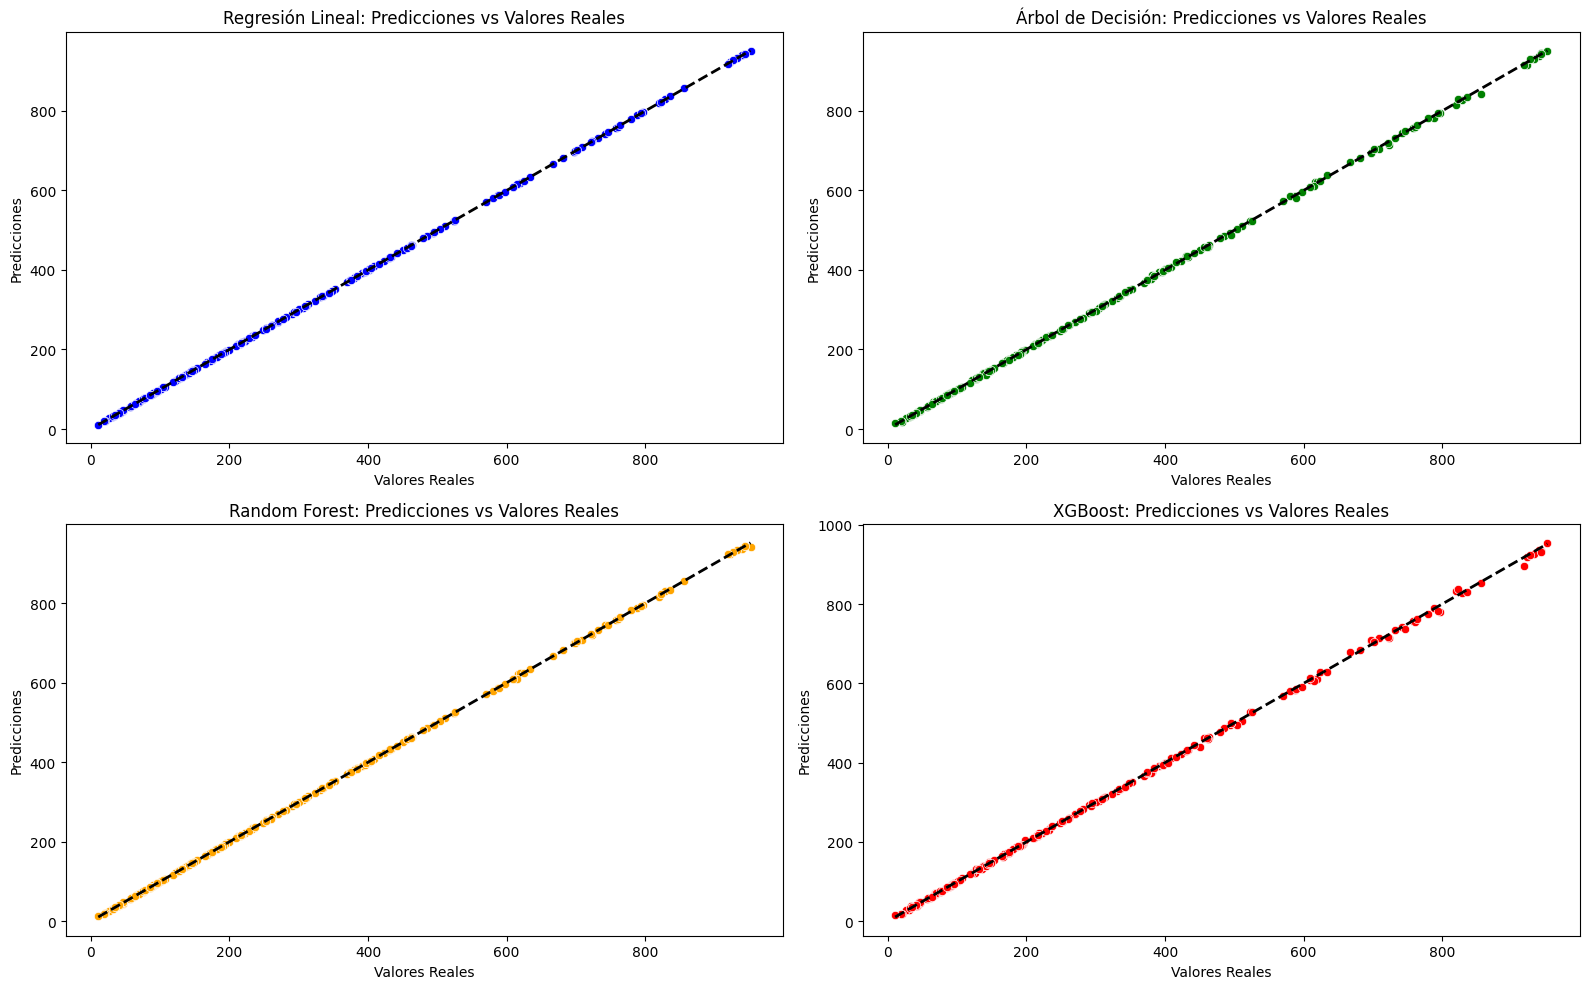

In [922]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(16, 10))

# Regresión Lineal
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Árbol de Decisión
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_tree, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Árbol de Decisión: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Random Forest
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_forest, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# XGBoost
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()


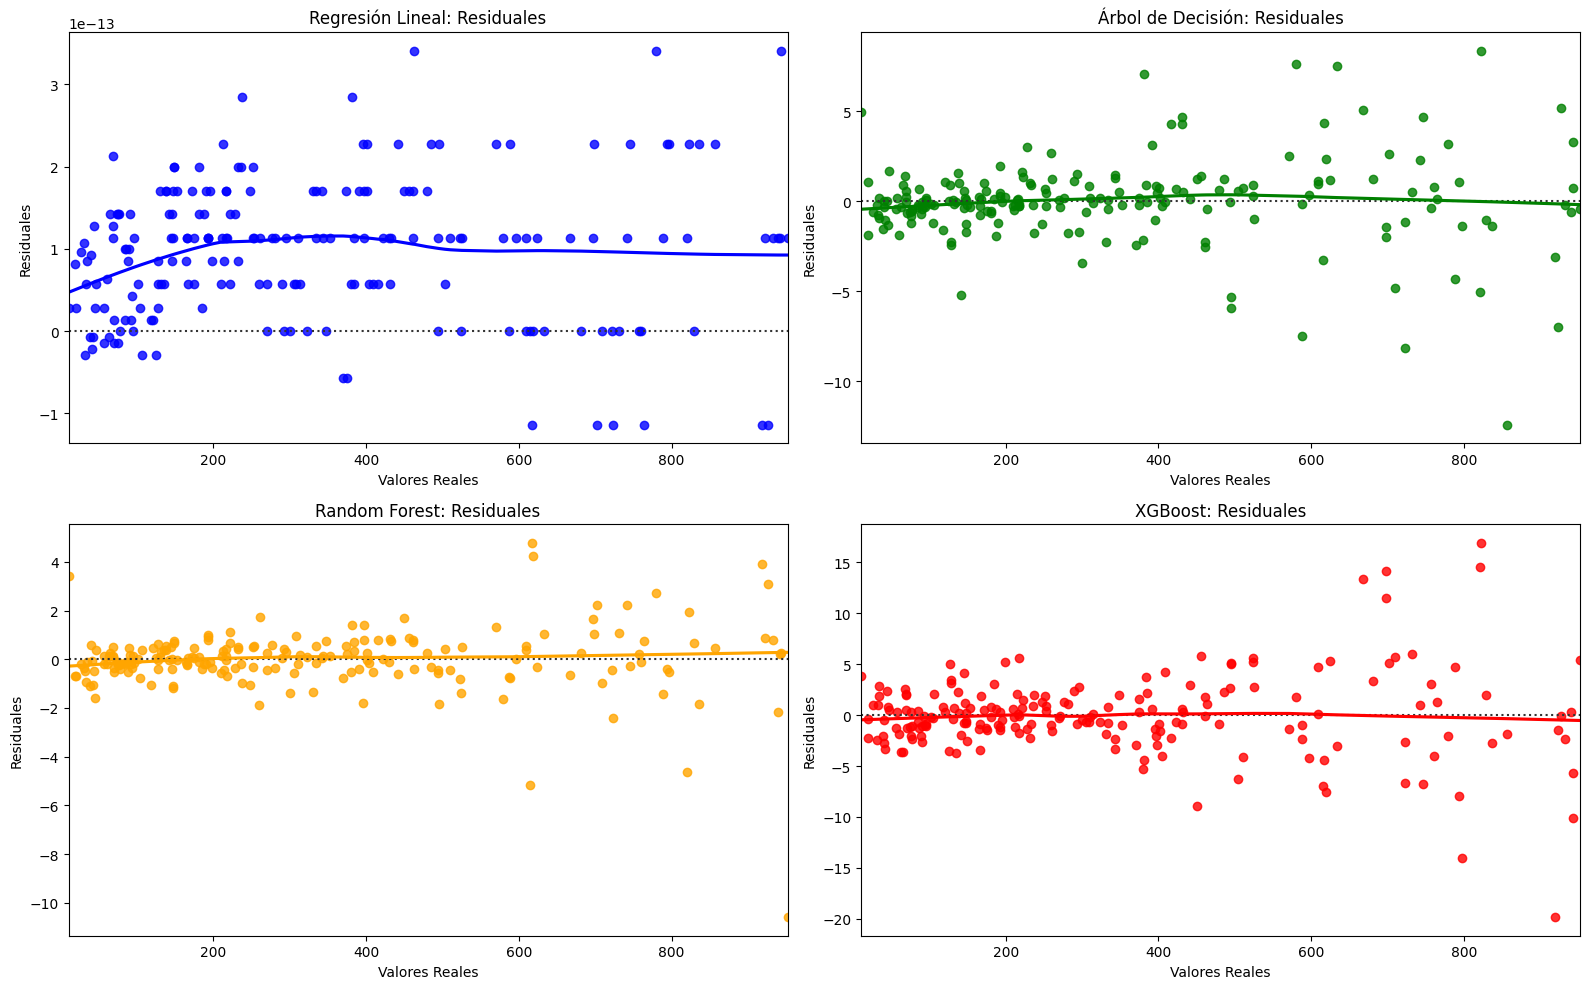

In [923]:
plt.figure(figsize=(16, 10))

# Regresión Lineal
plt.subplot(2, 2, 1)
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color='blue')
plt.title('Regresión Lineal: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Árbol de Decisión
plt.subplot(2, 2, 2)
sns.residplot(x=y_test, y=y_pred_tree, lowess=True, color='green')
plt.title('Árbol de Decisión: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Random Forest
plt.subplot(2, 2, 3)
sns.residplot(x=y_test, y=y_pred_forest, lowess=True, color='orange')
plt.title('Random Forest: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# XGBoost
plt.subplot(2, 2, 4)
sns.residplot(x=y_test, y=y_pred_xgboost, lowess=True, color='red')
plt.title('XGBoost: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

plt.tight_layout()
plt.show()


Si quizieramos predecir un precio con unas caracteristicas en concreto de un cliente se haria de la siguiente manera

In [924]:
# Tomemos una fila de X_test para predecir (puede ser cualquier fila)
sample = X_test.iloc[0]

# Reshape del sample porque los modelos esperan un array 2D (n_samples, n_features)
sample_reshaped = sample.values.reshape(1, -1)

# Predicción usando los modelos entrenados
predicted_linear = linear_model.predict(sample_reshaped)
predicted_tree = tree_model.predict(sample_reshaped)
predicted_forest = forest_model.predict(sample_reshaped)
predicted_xgboost = xgboost_model.predict(sample_reshaped)

# Mostrar las predicciones de cada modelo
print(f"Predicción del modelo de Regresión Lineal: {predicted_linear[0]:.2f}")
print(f"Predicción del modelo de Árbol de Decisión: {predicted_tree[0]:.2f}")
print(f"Predicción del modelo de Random Forest: {predicted_forest[0]:.2f}")
print(f"Predicción del modelo de XGBoost: {predicted_xgboost[0]:.2f}")

# Mostrar el valor real correspondiente
real_value = y_test.iloc[0]
print(f"Valor real de la venta: {real_value:.2f}")


Predicción del modelo de Regresión Lineal: 523.97
Predicción del modelo de Árbol de Decisión: 523.85
Predicción del modelo de Random Forest: 522.53
Predicción del modelo de XGBoost: 528.40
Valor real de la venta: 523.97


c:\Users\mrami\anaconda3\envs\Phydata-Curso_20231119\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mrami\anaconda3\envs\Phydata-Curso_20231119\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\mrami\anaconda3\envs\Phydata-Curso_20231119\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Los modelos se ajustan demasiado bien por lo que podria ser indicativo de overfitting, quiza estamos usando demasiadas features en el entrenamiento.

Vamos a ver la matriz de correlacion

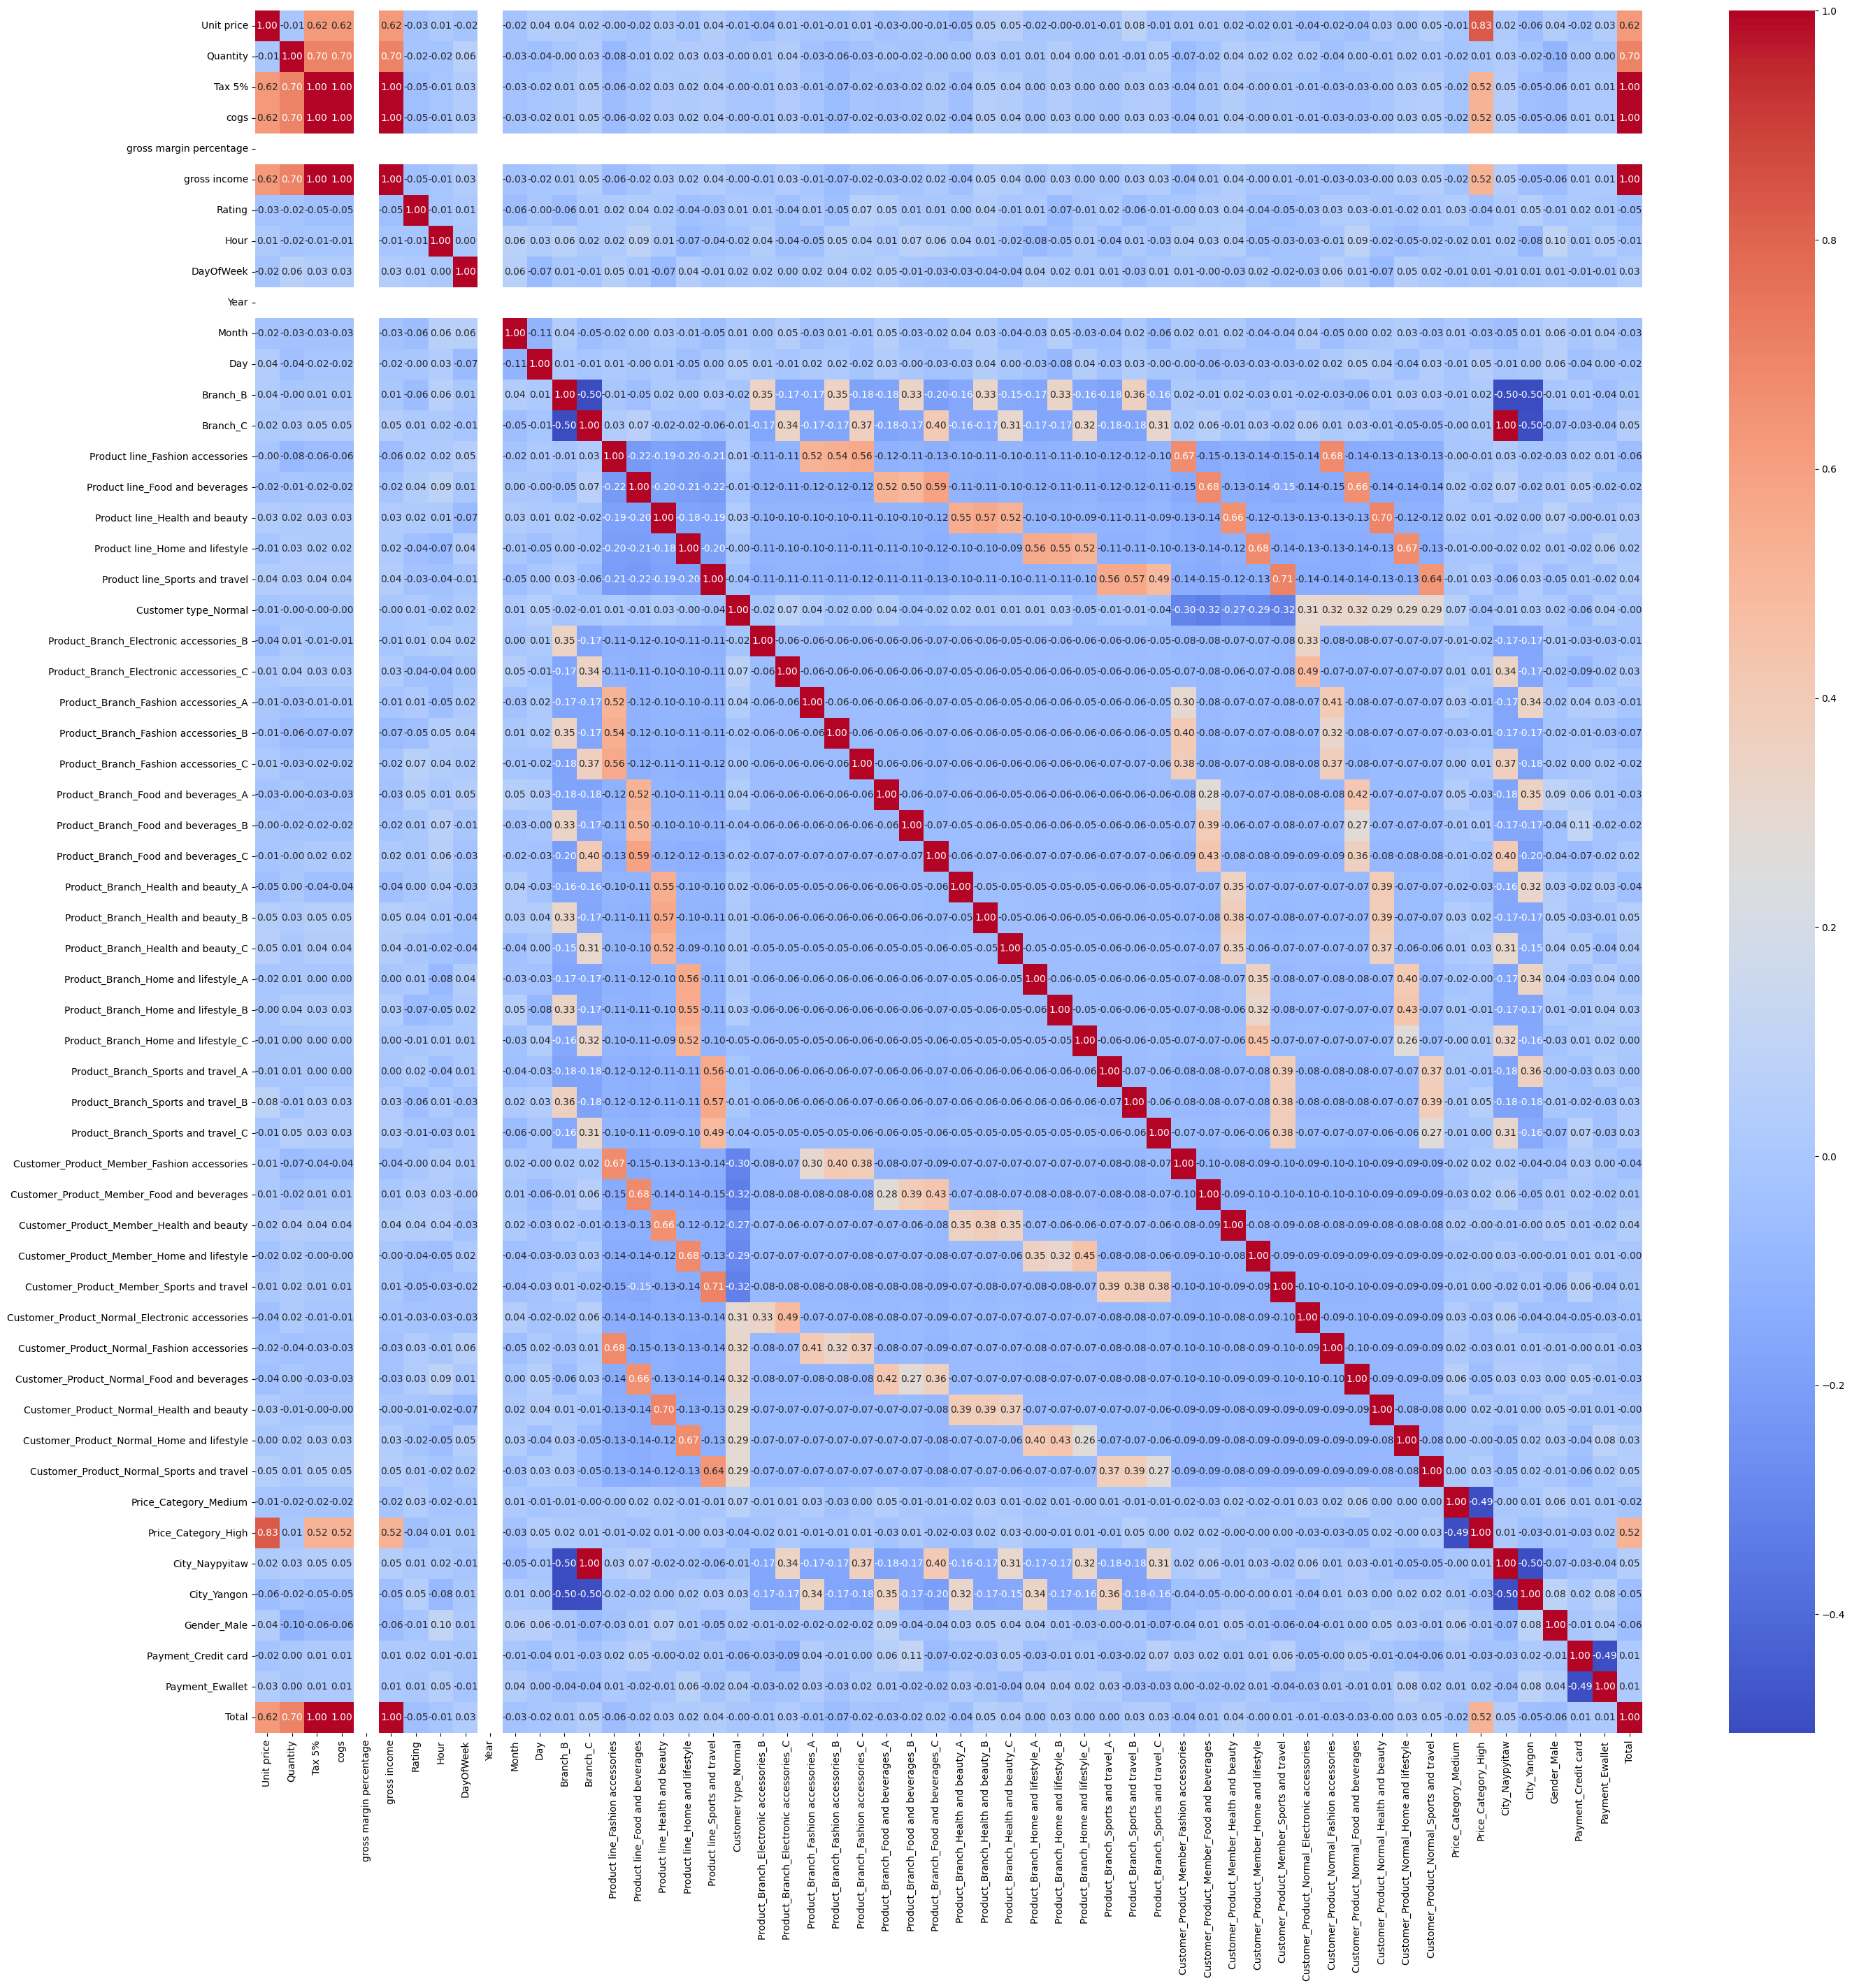

In [925]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.join(y_train).corr()
plt.figure(figsize=(32, 32))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


Hay unas columnas y filas en Blanco, esto se puede deber a que no se puede calcular la matriz de correlacion para esas  variables

In [926]:
print("Distribución de 'gross margin percentage':")
print(df['gross margin percentage'].value_counts())

print("\nDistribución de 'Year':")
print(df['Year'].value_counts())



Distribución de 'gross margin percentage':
gross margin percentage
4.761905    1000
Name: count, dtype: int64

Distribución de 'Year':
Year
2019    1000
Name: count, dtype: int64


Al ver la matriz de correlacion y como verificamos con value_counts, no existe variabilidad en estas features por lo que no es posible calcular la matriz de correlacion. Al no variar lo mejor es eliminarla de nuestro df y no usarlas en la prediccion. Tambien eliminaremos otras que creemos irrelevantes para la prediccion del precio en primera instancia.

In [927]:
#vemos las features actuales de nuestro df
df.keys()


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hour', 'DayOfWeek', 'Product_Branch', 'Year', 'Month', 'Day',
       'Customer_Product', 'Price_Category'],
      dtype='object')

In [928]:
# Eliminar columnas irrelevantes para simplificar el modelo
df_simplified = df.drop(['Invoice ID', 'Date', 'Time', 'Payment', 'gross margin percentage', 
                         'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 
                         'Customer type', 'Gender', 'Product_Branch', 'Customer_Product', 'Price_Category','Tax 5%'], 
                        axis=1)

# Codificar las variables categóricas restantes
df_simplified = pd.get_dummies(df_simplified, columns=['Branch', 'City', 'Product line'], drop_first=True)


print(df_simplified.dtypes)
df_simplified.head()


Unit price                          float64
Quantity                              int64
Total                               float64
cogs                                float64
gross income                        float64
Rating                              float64
Branch_B                               bool
Branch_C                               bool
City_Naypyitaw                         bool
City_Yangon                            bool
Product line_Fashion accessories       bool
Product line_Food and beverages        bool
Product line_Health and beauty         bool
Product line_Home and lifestyle        bool
Product line_Sports and travel         bool
dtype: object


Unit price  Quantity     Total    cogs  gross income  Rating  Branch_B  \
0       74.69         7  548.9715  522.83       26.1415     9.1     False   
1       15.28         5   80.2200   76.40        3.8200     9.6     False   
2       46.33         7  340.5255  324.31       16.2155     7.4     False   
3       58.22         8  489.0480  465.76       23.2880     8.4     False   
4       86.31         7  634.3785  604.17       30.2085     5.3     False   

   Branch_C  City_Naypyitaw  City_Yangon  Product line_Fashion accessories  \
0     False           False         True                             False   
1      True            True        False                             False   
2     False           False         True                             False   
3     False           False         True                             False   
4     False           False         True                             False   

   Product line_Food and beverages  Product line_Health and beauty  \
0                            False                            True   
1                            False                           False   
2                            False                           False   
3                            False                            True   
4                            False                           False   

   Product line_Home and lifestyle  Product line_Sports and travel  
0                            False                           False  
1                            False                           False  
2                             True                           False  
3                            False                           False  
4                            False                            True

In [929]:
# Selección de la variable objetivo
y = df_simplified['Total']

# Selección de las características predictoras
X = df_simplified.drop(['Total'], axis=1)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenamiento de un modelo de regresión lineal simple
linear_model_simplified = LinearRegression()
linear_model_simplified.fit(X_train, y_train)

# Evaluación del modelo
y_pred_simplified = linear_model_simplified.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_simplified))
mae = mean_absolute_error(y_test, y_pred_simplified)
r2 = r2_score(y_test, y_pred_simplified)

print(f"Modelo Simplificado - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")



Modelo Simplificado - RMSE: 0.00, MAE: 0.00, R²: 1.00


Vemos que incluso eliminando una gran variadead de features, nuestro modelo sigue produciendo un overfitting, vamos a ver si tenemos algunas variables correlacionadas que estemos usando

In [930]:
corr_matrix = df_simplified.corr()
print(corr_matrix['Total'].sort_values(ascending=False))


Total                               1.000000
gross income                        1.000000
cogs                                1.000000
Quantity                            0.705510
Unit price                          0.633962
Branch_C                            0.040176
City_Naypyitaw                      0.040176
Product line_Home and lifestyle     0.024276
Product line_Sports and travel      0.016517
Product line_Health and beauty      0.001165
Product line_Food and beverages    -0.000551
Branch_B                           -0.008876
City_Yangon                        -0.030994
Product line_Fashion accessories   -0.033850
Rating                             -0.036442
Name: Total, dtype: float64


Como vemos tenemos algunas variables que estan correlacionadas con "Total" de manera casi perfecta. No usaremos estas en la prediccion para evitar el overfitting.

In [931]:
df.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hour', 'DayOfWeek', 'Product_Branch', 'Year', 'Month', 'Day',
       'Customer_Product', 'Price_Category'],
      dtype='object')

In [932]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33         7  16.2155   340.5255  ...   
3         Health and beauty       58.22         8  23.2880   489.0480  ...   
4         Sports and travel       86.31         7  30.2085   634.3785  ...   
..                      ...         ...       ...      ...        ...  ...   
995       Health and beauty       40.35         1   2.0175    42.3675  ...   
996      Home and lifestyle       97.38        10  48.6900  1022.4900  ...   
997      Food and beverages       31.84         1   1.5920    33.4320  ...   
998      Home and lifestyle       65.82         1   3.2910    69.1110  ...   
999     Fashion accessories       88.34         7  30.9190   649.2990  ...   

    gross income Rating Hour  DayOfWeek            Product_Branch  Year  \
0        26.1415    9.1   13          5       Health and beauty_A  2019   
1         3.8200    9.6   10          4  Electronic accessories_C  2019   
2        16.2155    7.4   13          6      Home and lifestyle_A  2019   
3        23.2880    8.4   20          6       Health and beauty_A  2019   
4        30.2085    5.3   10          4       Sports and travel_A  2019   
..           ...    ...  ...        ...                       ...   ...   
995       2.0175    6.2   13          1       Health and beauty_C  2019   
996      48.6900    4.4   17          5      Home and lifestyle_B  2019   
997       1.5920    7.7   13          5      Food and beverages_A  2019   
998       3.2910    4.1   15          4      Home and lifestyle_A  2019   
999      30.9190    6.6   13          0     Fashion accessories_A  2019   

     Month  Day               Customer_Product Price_Category  
0        1    5       Member_Health and beauty           High  
1        3    8  Normal_Electronic accessories            Low  
2        3    3      Normal_Home and lifestyle         Medium  
3        1   27       Member_Health and beauty         Medium  
4        2    8       Normal_Sports and travel           High  
..     ...  ...                            ...            ...  
995      1   29       Normal_Health and beauty         Medium  
996      3    2      Normal_Home and lifestyle           High  
997      2    9      Member_Food and beverages            Low  
998      2   22      Normal_Home and lifestyle         Medium  
999      2   18     Member_Fashion accessories           High  

[1000 rows x 25 columns]

In [933]:

# Eliminar las características que tienen correlación perfecta con 'Total'
#df_reduced = df_simplified.drop(['Tax 5%', 'gross income', 'cogs','Unit price','Quantity'], axis=1) #esta es cuando quiero sacar con correlacion total

df_reduced = df.drop(['Tax 5%', 'gross income', 'cogs','Invoice ID','Product_Branch',
                      'Customer_Product','Price_Category','Year','Date','Time','gross margin percentage'], axis=1) #probando  sacando las correlacion total y las relacionadas con  la variable total
df_reduced = pd.get_dummies(df_reduced, columns=['Branch', 'City', 'Product line','Customer type','Gender',
                                                 "Payment"], drop_first=True)

#df_reduced = df_simplified.drop(['Tax 5%', 'gross income', 'cogs','City_Naypyitaw','City_Yangon','Branch_C','Branch_B','Rating'], axis=1)
#df_reduced = df_reduced[['Unit price', 'Quantity','Total']]
df_reduced


Unit price  Quantity      Total  Rating  Hour  DayOfWeek  Month  Day  \
0         74.69         7   548.9715     9.1    13          5      1    5   
1         15.28         5    80.2200     9.6    10          4      3    8   
2         46.33         7   340.5255     7.4    13          6      3    3   
3         58.22         8   489.0480     8.4    20          6      1   27   
4         86.31         7   634.3785     5.3    10          4      2    8   
..          ...       ...        ...     ...   ...        ...    ...  ...   
995       40.35         1    42.3675     6.2    13          1      1   29   
996       97.38        10  1022.4900     4.4    17          5      3    2   
997       31.84         1    33.4320     7.7    13          5      2    9   
998       65.82         1    69.1110     4.1    15          4      2   22   
999       88.34         7   649.2990     6.6    13          0      2   18   

     Branch_B  Branch_C  ...  City_Yangon  Product line_Fashion accessories  \
0       False     False  ...         True                             False   
1       False      True  ...        False                             False   
2       False     False  ...         True                             False   
3       False     False  ...         True                             False   
4       False     False  ...         True                             False   
..        ...       ...  ...          ...                               ...   
995     False      True  ...        False                             False   
996      True     False  ...        False                             False   
997     False     False  ...         True                             False   
998     False     False  ...         True                             False   
999     False     False  ...         True                              True   

     Product line_Food and beverages  Product line_Health and beauty  \
0                              False                            True   
1                              False                           False   
2                              False                           False   
3                              False                            True   
4                              False                           False   
..                               ...                             ...   
995                            False                            True   
996                            False                           False   
997                             True                           False   
998                            False                           False   
999                            False                           False   

     Product line_Home and lifestyle  Product line_Sports and travel  \
0                              False                           False   
1                              False                           False   
2                               True                           False   
3                              False                           False   
4                              False                            True   
..                               ...                             ...   
995                            False                           False   
996                             True                           False   
997                            False                           False   
998                             True                           False   
999                            False                           False   

     Customer type_Normal  Gender_Male  Payment_Credit card  Payment_Ewallet  
0                   False        False                False             True  
1                    True        False                False            False  
2                    True         True                 True            False  
3                   False         True                False             True  
4     

In [934]:


y = df_reduced['Total']
X = df_reduced.drop(['Total'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenar y evaluar el modelo de Regresión Lineal
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train, y_train)
y_pred_linear = linear_model_reduced.predict(X_test)

# Entrenar y evaluar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Entrenar y evaluar el modelo de Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Entrenar y evaluar el modelo de XGBoost
xgboost_model = xgb.XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)



# Calcular las métricas para cada modelo
def print_metrics(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

print_metrics(y_test, y_pred_linear, "Regresión Lineal")
print_metrics(y_test, y_pred_tree, "Árbol de Decisión")
print_metrics(y_test, y_pred_forest, "Random Forest")
print_metrics(y_test, y_pred_xgboost, "XGBoost")



Regresión Lineal - RMSE: 79.69, MAE: 59.26, R²: 0.90
Árbol de Decisión - RMSE: 15.90, MAE: 9.53, R²: 1.00
Random Forest - RMSE: 11.02, MAE: 7.32, R²: 1.00
XGBoost - RMSE: 9.93, MAE: 7.03, R²: 1.00


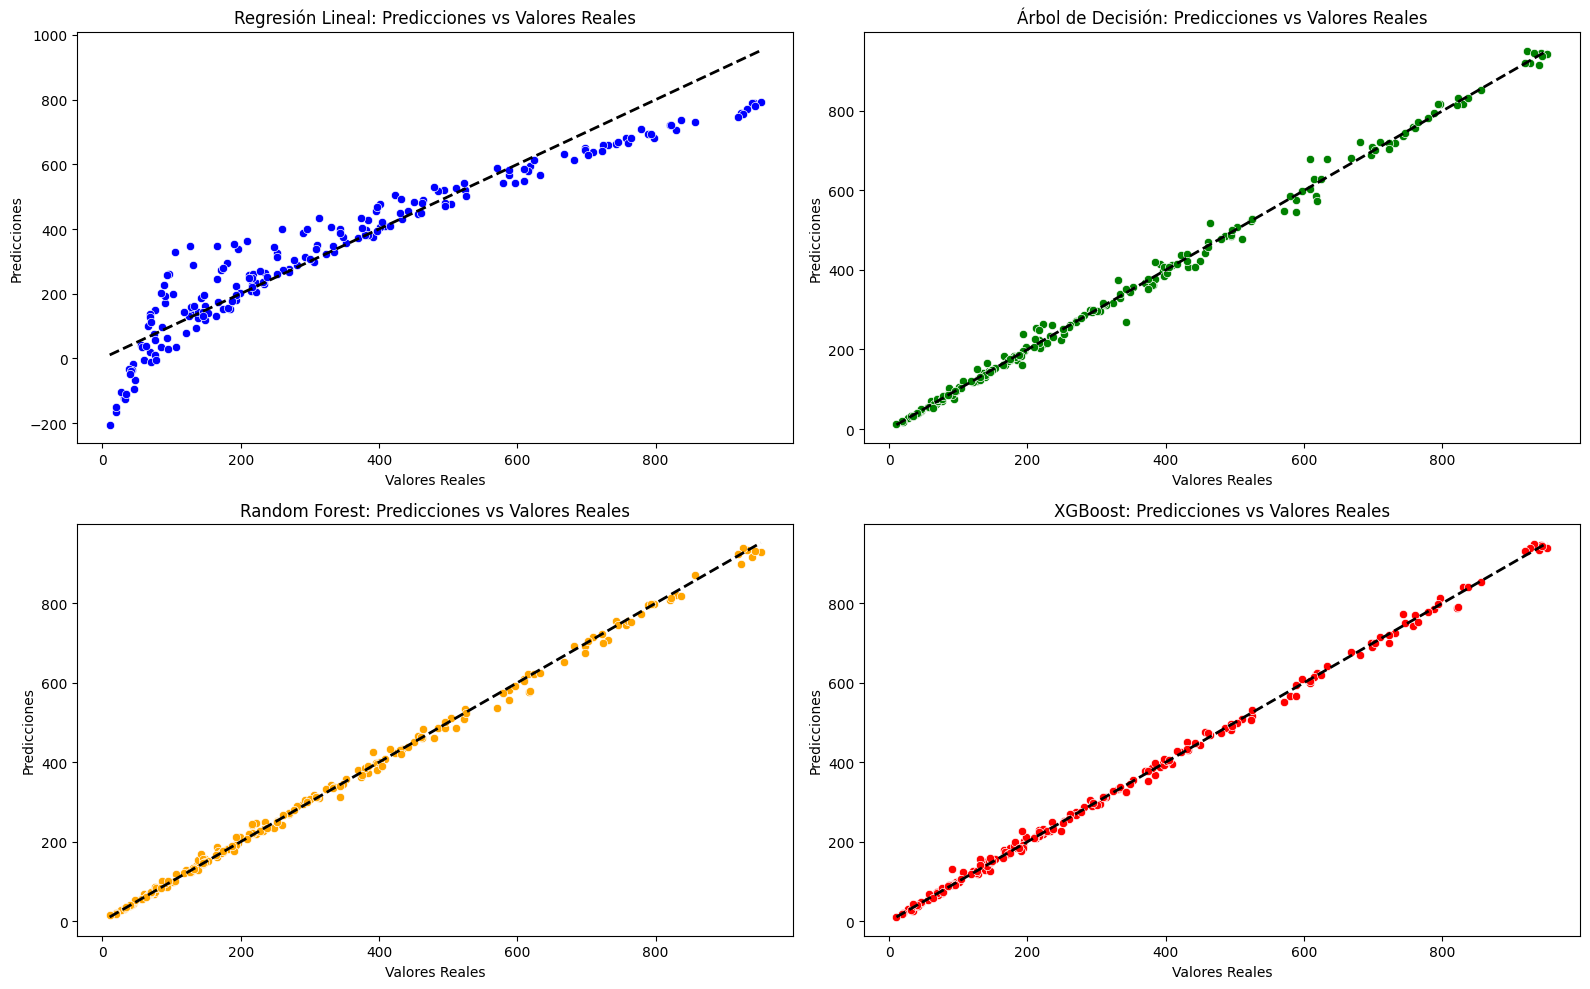

In [935]:
# Crear un gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(16, 10))

# Regresión Lineal
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Árbol de Decisión
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_tree, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Árbol de Decisión: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Random Forest
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_forest, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# XGBoost
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()


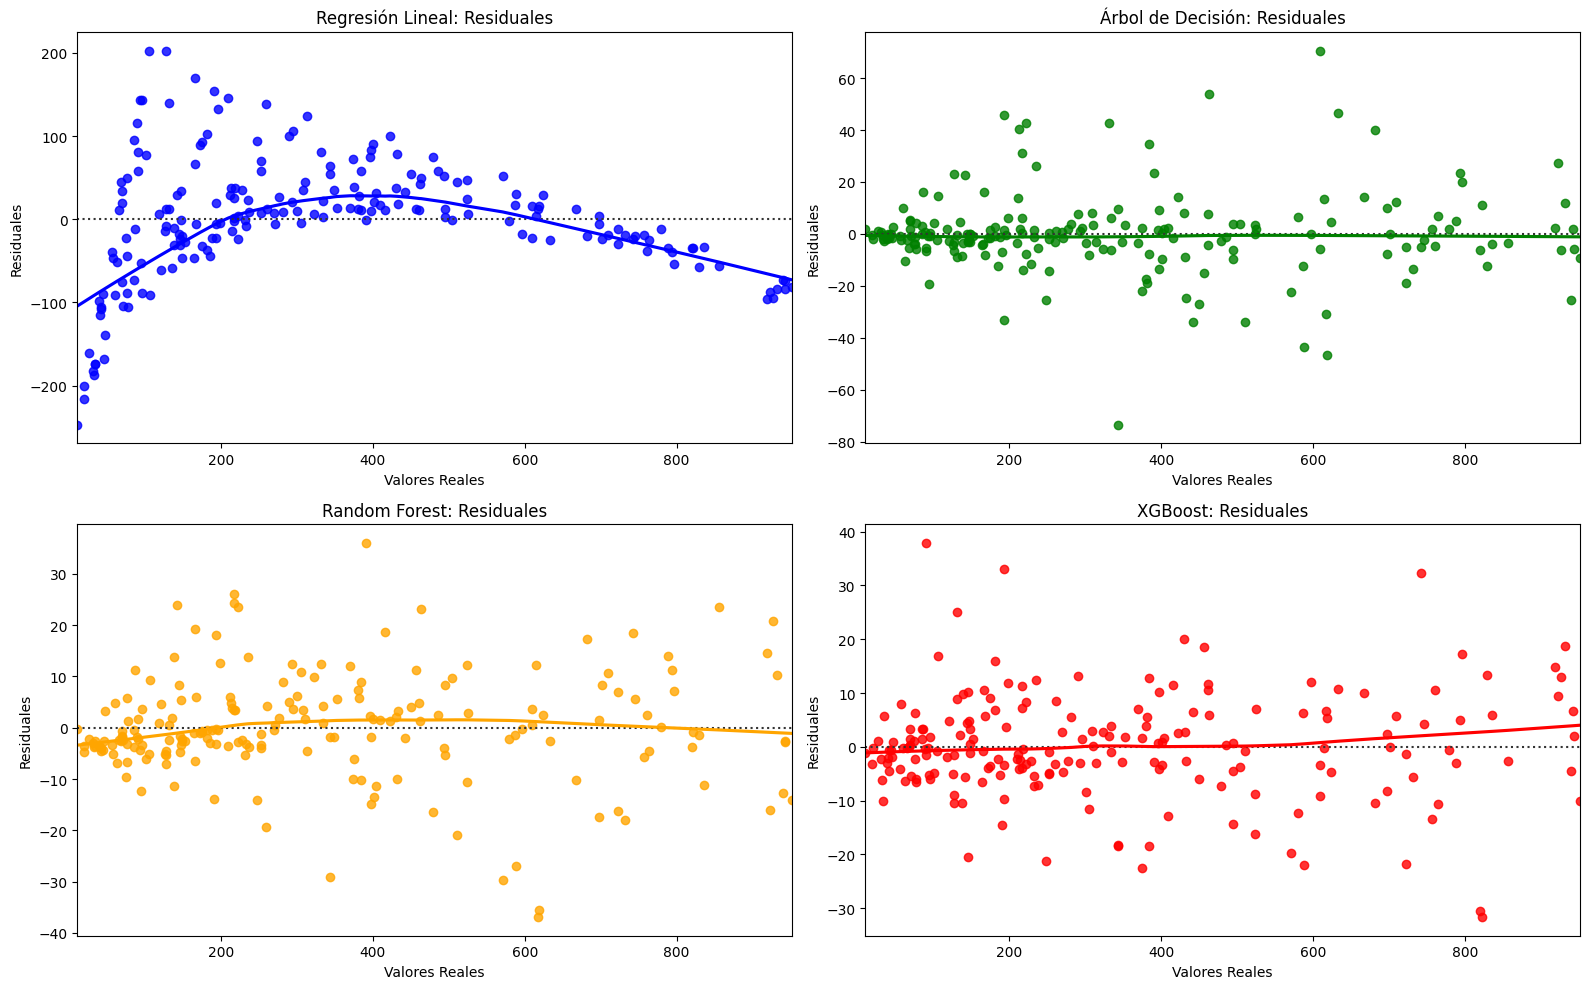

In [936]:
plt.figure(figsize=(16, 10))

# Regresión Lineal
plt.subplot(2, 2, 1)
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color='blue')
plt.title('Regresión Lineal: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Árbol de Decisión
plt.subplot(2, 2, 2)
sns.residplot(x=y_test, y=y_pred_tree, lowess=True, color='green')
plt.title('Árbol de Decisión: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Random Forest
plt.subplot(2, 2, 3)
sns.residplot(x=y_test, y=y_pred_forest, lowess=True, color='orange')
plt.title('Random Forest: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# XGBoost
plt.subplot(2, 2, 4)
sns.residplot(x=y_test, y=y_pred_xgboost, lowess=True, color='red')
plt.title('XGBoost: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

plt.tight_layout()
plt.show()


Si se han dado cuenta los modelos que hemos usado estan muy cargados a los arboles de desicion, siendo 3 de ellos de este tipo. ¿Y si probamos algo distinto?



####  Support Vector Regressor (SVR):

El Support Vector Regressor (SVR) es una extensión del Support Vector Machine (SVM) que se utiliza para regresión. En lugar de encontrar un hiperplano que separa las clases (como en la clasificación), SVR intenta encontrar una línea o un hiperplano que se ajuste a los datos dentro de un margen aceptable de error.

In [937]:
from sklearn.svm import SVR

# Entrenar y evaluar el modelo de Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print_metrics(y_test, y_pred_svr, "Support Vector Regressor")


Support Vector Regressor - RMSE: 232.04, MAE: 173.78, R²: 0.17


#### K-Nearest Neighbors Regressor (KNN Regressor):
El modelo de K-Nearest Neighbors (KNN) para regresión predice el valor de una nueva observación basándose en los valores de las observaciones más cercanas (vecinos) en el conjunto de datos de entrenamiento. Es un enfoque basado en instancias que no hace suposiciones sobre la forma de la función de predicción.

In [938]:
from sklearn.neighbors import KNeighborsRegressor

# Entrenar y evaluar el modelo de K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")


K-Nearest Neighbors Regressor - RMSE: 93.29, MAE: 68.93, R²: 0.87


#### Gaussian Process Regressor:
El Gaussian Process Regressor es un enfoque bayesiano no paramétrico que utiliza funciones gaussianas para modelar la distribución sobre las funciones posibles. Es un modelo flexible que puede capturar relaciones complejas en los datos.

In [939]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Entrenar y evaluar el modelo de Gaussian Process Regressor
gp_model = GaussianProcessRegressor()
gp_model.fit(X_train, y_train)
y_pred_gp = gp_model.predict(X_test)

print_metrics(y_test, y_pred_gp, "Gaussian Process Regressor")


Gaussian Process Regressor - RMSE: 422.28, MAE: 337.07, R²: -1.74


#### Resumen Metricas de Todos los Modelos empleados:

In [940]:
print_metrics(y_test, y_pred_linear, "Regresión Lineal")
print_metrics(y_test, y_pred_tree, "Árbol de Decisión")
print_metrics(y_test, y_pred_forest, "Random Forest")
print_metrics(y_test, y_pred_xgboost, "XGBoost")
print_metrics(y_test, y_pred_svr, "Support Vector Regressor")
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")
print_metrics(y_test, y_pred_gp, "Gaussian Process Regressor")


Regresión Lineal - RMSE: 79.69, MAE: 59.26, R²: 0.90
Árbol de Decisión - RMSE: 15.90, MAE: 9.53, R²: 1.00
Random Forest - RMSE: 11.02, MAE: 7.32, R²: 1.00
XGBoost - RMSE: 9.93, MAE: 7.03, R²: 1.00
Support Vector Regressor - RMSE: 232.04, MAE: 173.78, R²: 0.17
K-Nearest Neighbors Regressor - RMSE: 93.29, MAE: 68.93, R²: 0.87
Gaussian Process Regressor - RMSE: 422.28, MAE: 337.07, R²: -1.74


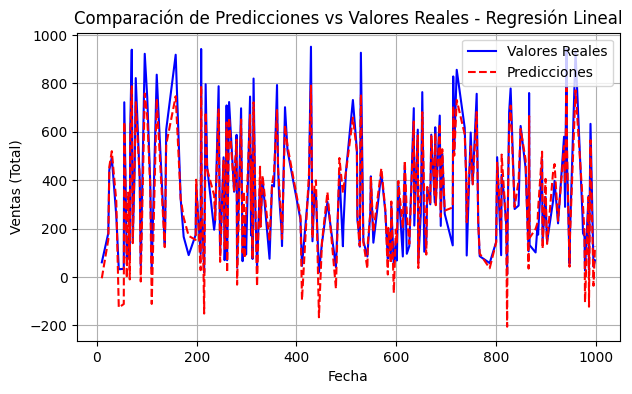

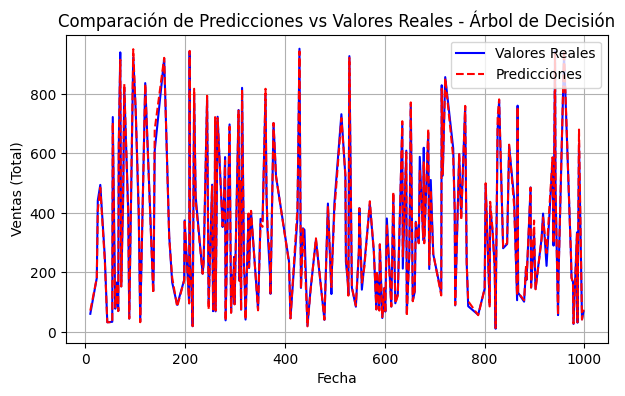

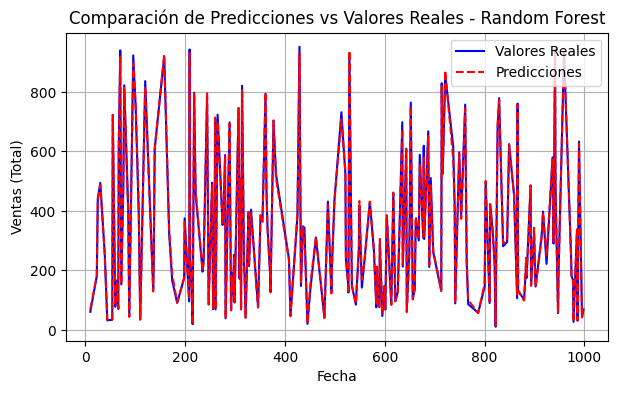

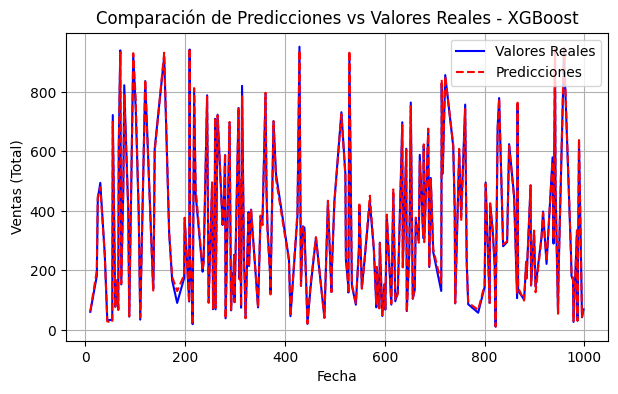

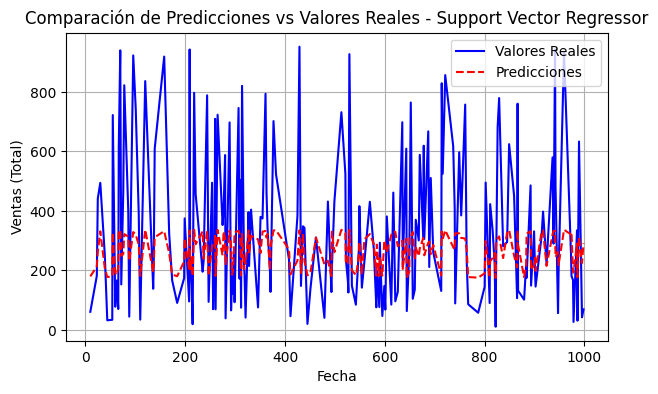

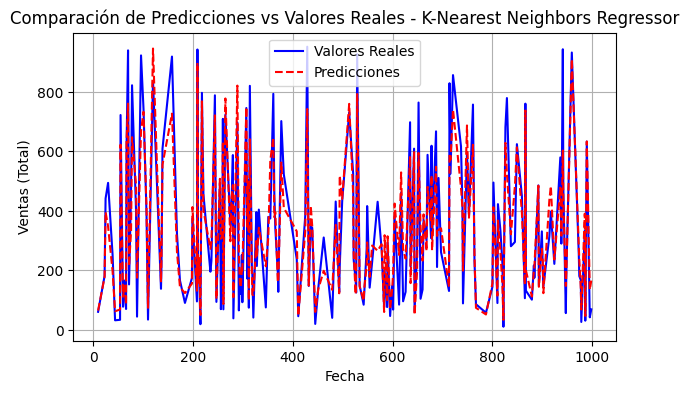

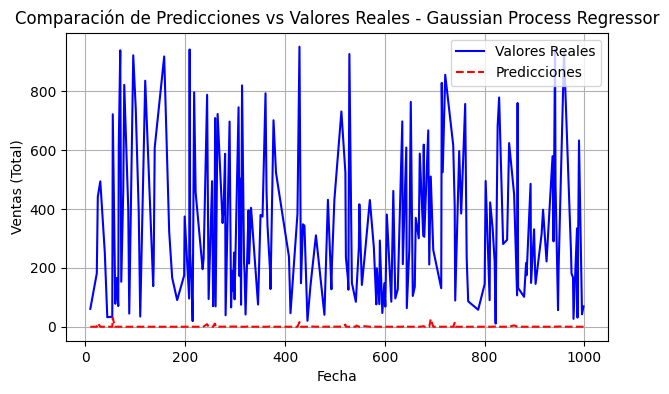

In [941]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponemos que ya tienes los siguientes modelos entrenados y sus predicciones:
# y_pred_linear, y_pred_tree, y_pred_forest, y_pred_xgboost, y_pred_svr, y_pred_knn, y_pred_gp

# Diccionario con los nombres de los modelos y sus predicciones
predicciones_modelos = {
    "Regresión Lineal": y_pred_linear,
    "Árbol de Decisión": y_pred_tree,
    "Random Forest": y_pred_forest,
    "XGBoost": y_pred_xgboost,
    "Support Vector Regressor": y_pred_svr,
    "K-Nearest Neighbors Regressor": y_pred_knn,
    "Gaussian Process Regressor": y_pred_gp
}

# Crear un ciclo para graficar las predicciones de cada modelo
for nombre_modelo, predicciones in predicciones_modelos.items():
    # Crear un DataFrame con los valores reales y las predicciones del modelo actual
    df_predictions = pd.DataFrame({
        'Real': y_test,
        'Predicted': predicciones
    }, index=X_test.index)

    # Ordenar por fecha para que la gráfica sea correcta
    df_predictions.sort_index(inplace=True)

    # Crear el gráfico
    plt.figure(figsize=(7, 4))
    plt.plot(df_predictions.index, df_predictions['Real'], label='Valores Reales', color='blue')
    plt.plot(df_predictions.index, df_predictions['Predicted'], label='Predicciones', color='red', linestyle='--')

    # Configurar el gráfico
    plt.title(f'Comparación de Predicciones vs Valores Reales - {nombre_modelo}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas (Total)')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Visualizamos todos los Modelos

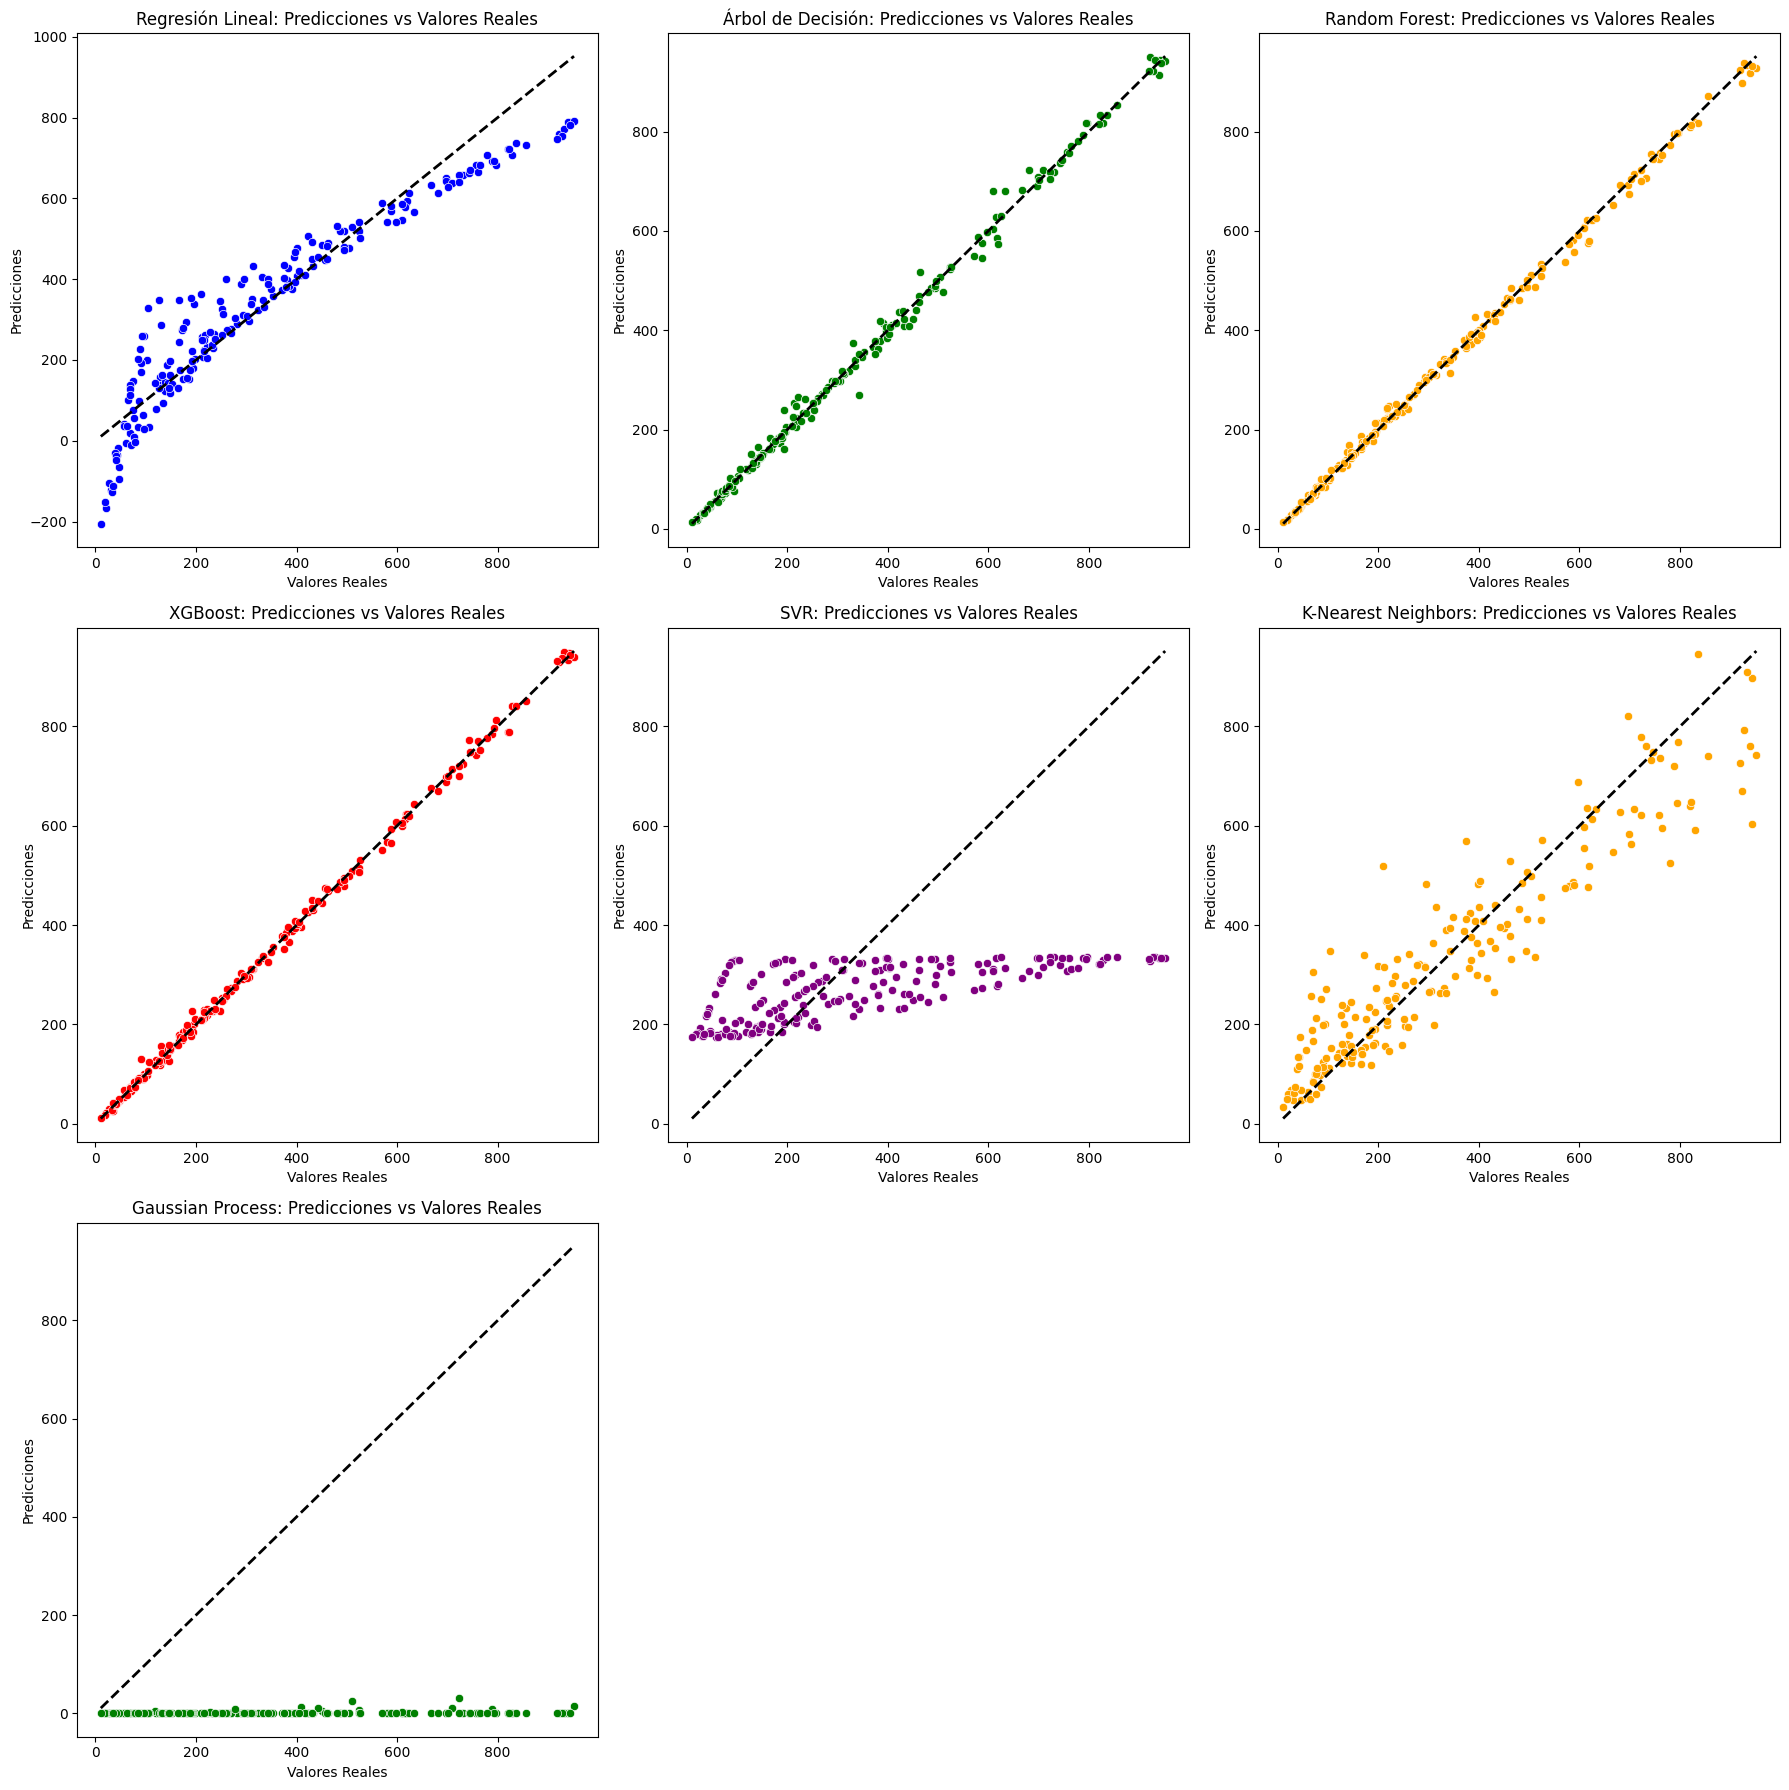

In [942]:
plt.figure(figsize=(18, 18))

# Regresión Lineal
plt.subplot(3, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Árbol de Decisión
plt.subplot(3, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_tree, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Árbol de Decisión: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Random Forest
plt.subplot(3, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_forest, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# XGBoost
plt.subplot(3, 3, 4)
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Support Vector Regressor (SVR)
plt.subplot(3, 3, 5)
sns.scatterplot(x=y_test, y=y_pred_svr, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('SVR: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# K-Nearest Neighbors (KNN)
plt.subplot(3, 3, 6)
sns.scatterplot(x=y_test, y=y_pred_knn, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('K-Nearest Neighbors: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Gaussian Process Regressor
plt.subplot(3, 3, 7)
sns.scatterplot(x=y_test, y=y_pred_gp, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Gaussian Process: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()


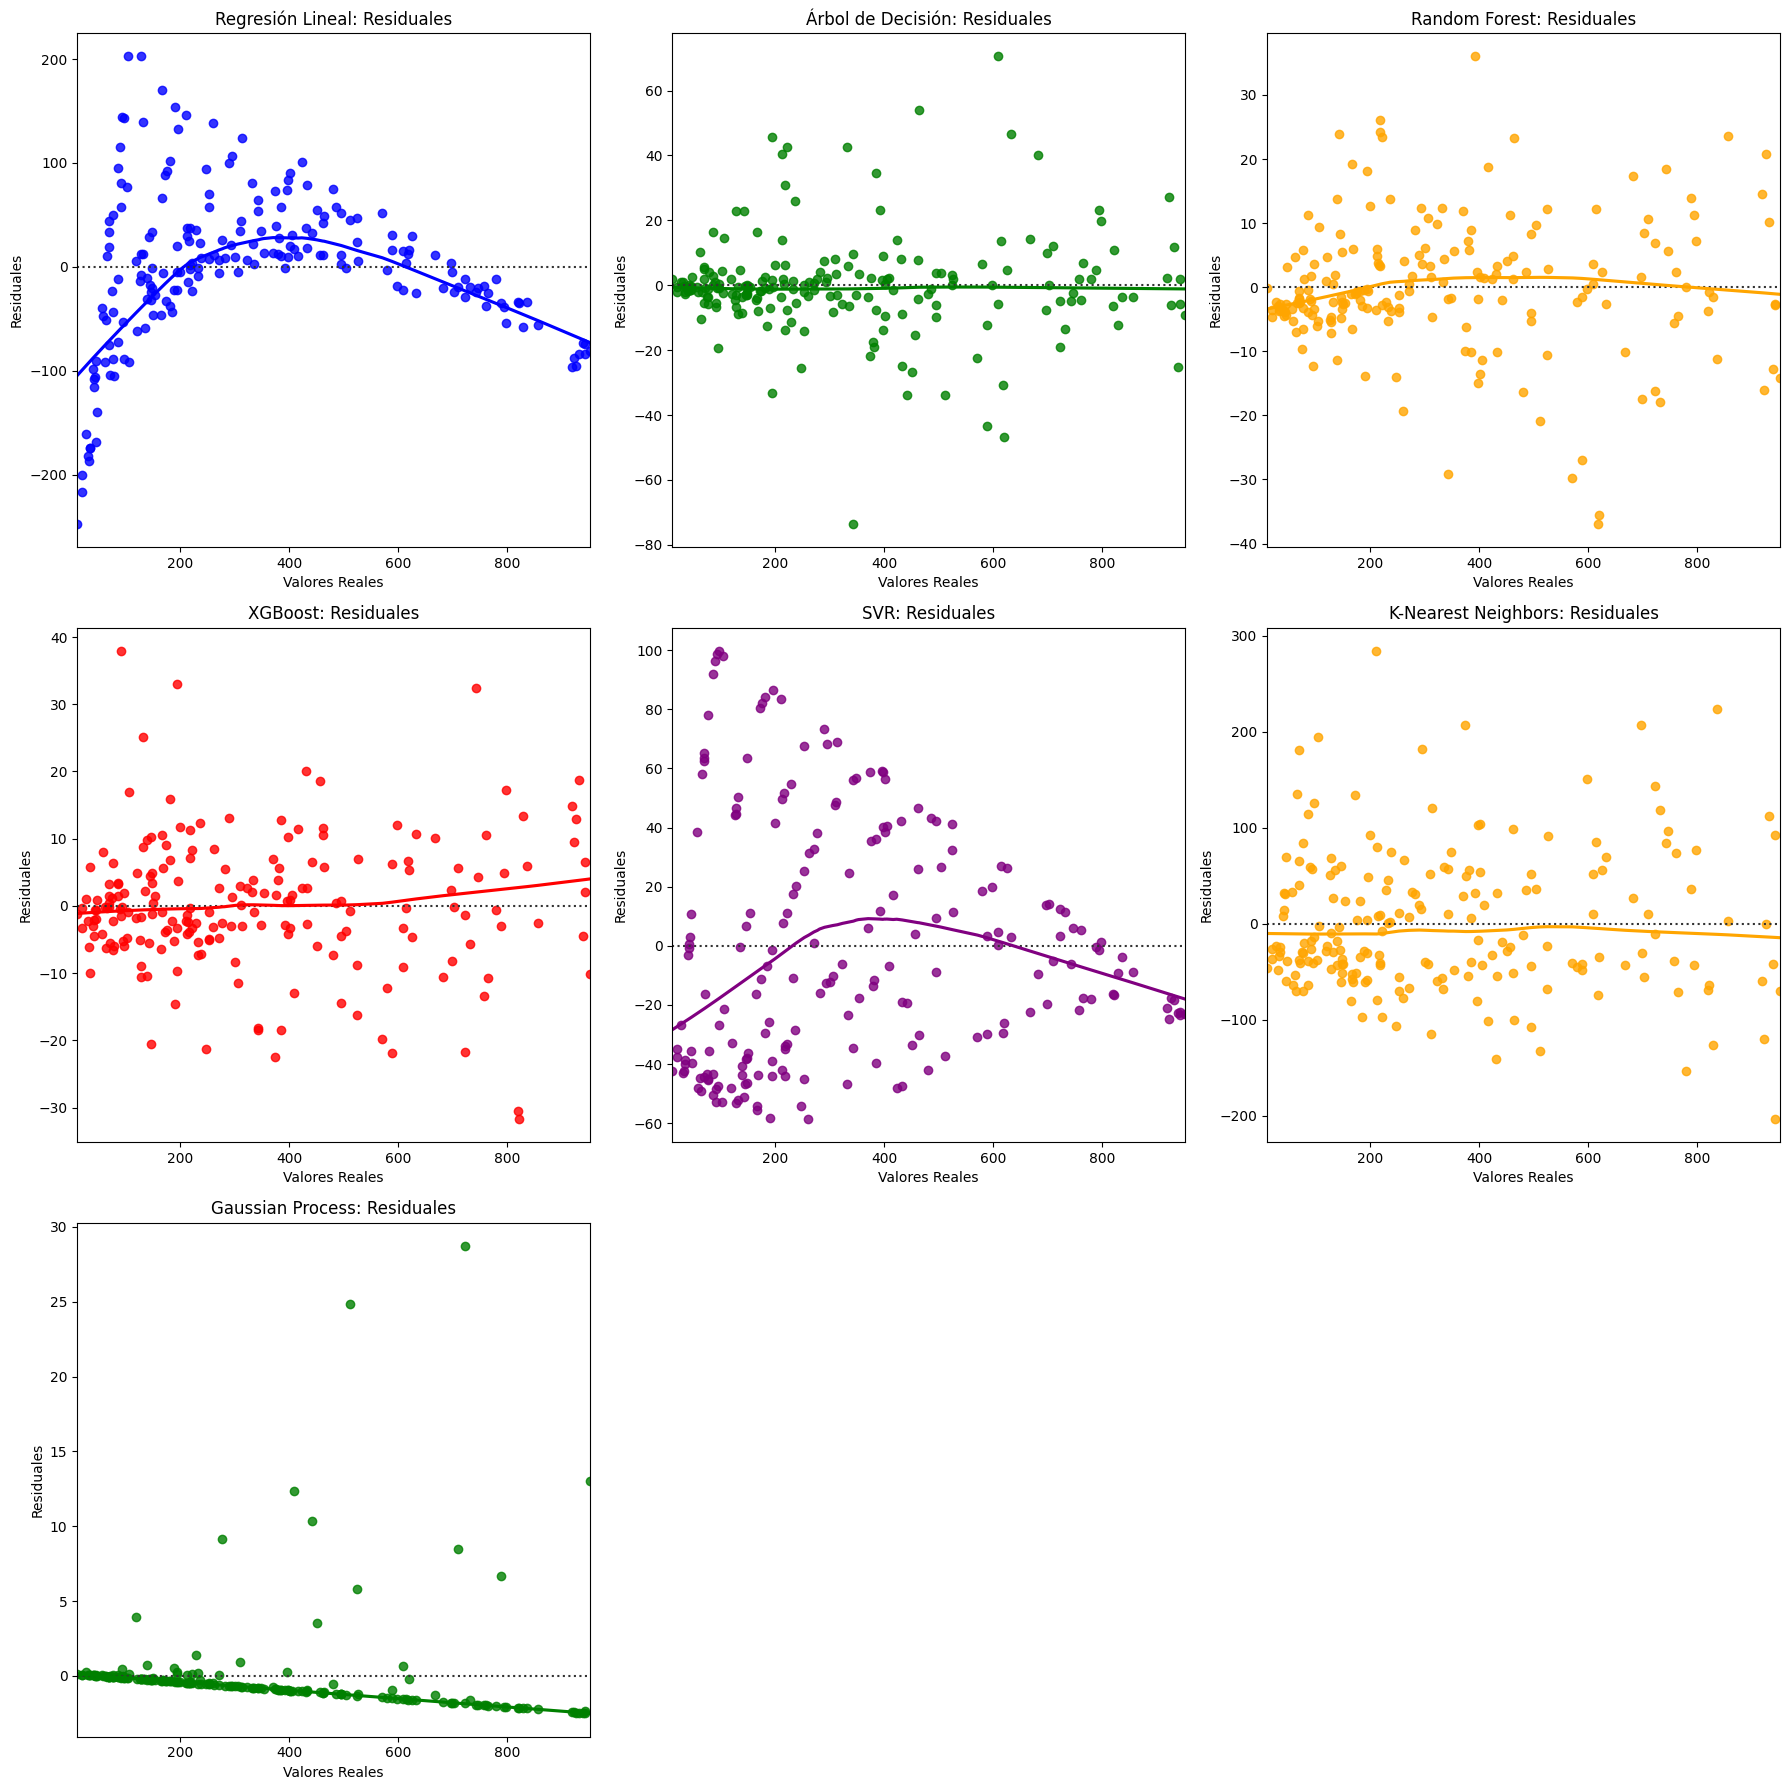

In [943]:
plt.figure(figsize=(18, 18))

# Regresión Lineal
plt.subplot(3, 3, 1)
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color='blue')
plt.title('Regresión Lineal: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Árbol de Decisión
plt.subplot(3, 3, 2)
sns.residplot(x=y_test, y=y_pred_tree, lowess=True, color='green')
plt.title('Árbol de Decisión: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Random Forest
plt.subplot(3, 3, 3)
sns.residplot(x=y_test, y=y_pred_forest, lowess=True, color='orange')
plt.title('Random Forest: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# XGBoost
plt.subplot(3, 3, 4)
sns.residplot(x=y_test, y=y_pred_xgboost, lowess=True, color='red')
plt.title('XGBoost: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Support Vector Regressor (SVR)
plt.subplot(3, 3, 5)
sns.residplot(x=y_test, y=y_pred_svr, lowess=True, color='purple')
plt.title('SVR: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# K-Nearest Neighbors (KNN)
plt.subplot(3, 3, 6)
sns.residplot(x=y_test, y=y_pred_knn, lowess=True, color='orange')
plt.title('K-Nearest Neighbors: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

# Gaussian Process Regressor
plt.subplot(3, 3, 7)
sns.residplot(x=y_test, y=y_pred_gp, lowess=True, color='green')
plt.title('Gaussian Process: Residuales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')

plt.tight_layout()
plt.show()


Entre los tres modelos evaluados, **Random Forest** demostró ser el más preciso, con el RMSE y MAE más bajos, lo que indica que predice valores más cercanos a los reales en comparación con **XGBoost** y **Árbol de Decisión**. Aunque **XGBoost** también muestra un rendimiento excelente y muy similar al de Random Forest, Random Forest es ligeramente superior en este conjunto de datos. **Árbol de Decisión**, aunque simple, resultó menos preciso. Por lo tanto, **Random Forest** es la mejor opción por su equilibrio entre precisión y rendimiento.

El sobre ajuste de R^2 puede deberse a las nuevas variables introducidas sinteticamente o al hecho de que los datos son de bases de datos de practica

### Ahora Intentaremos predecir precios FUTUROS

Primero intentaremos predecir precios futuros entrenando un df con resample, donde creamos una nueva features que guarda los totales del dia siguiente "Sales_next_day"

In [944]:
#leemos de nuevo el df para evitar usar alguno modificado en procesos anteriores
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [945]:
#reformateamos las fechas
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [946]:
import pandas as pd


# Paso 2: Seleccionar solo las columnas numéricas para resampleo
df_numeric = df.select_dtypes(include=['number'])

# Resamplear por día para obtener el total de ventas diarias
df_daily = df_numeric.resample('D').sum()

# Paso 3: Manejar las columnas categóricas (seleccionando la moda o algún otro método)
df_categorical = df.select_dtypes(include=['object'])

# Resamplear por día seleccionando el valor más frecuente (moda)
df_categorical_resampled = df_categorical.resample('D').agg(lambda x: x.mode()[0])

# Paso 4: Combinar las columnas numéricas y categóricas resampleadas
df_resampled = pd.concat([df_daily, df_categorical_resampled], axis=1)

# Ver los primeros resultados
df_resampled.head()


Unit price  Quantity    Tax 5%      Total     cogs  \
Date                                                             
2019-01-01      659.95        81  225.9610  4745.1810  4519.22   
2019-01-02      357.08        48   92.6430  1945.5030  1852.86   
2019-01-03      475.66        37   98.9585  2078.1285  1979.17   
2019-01-04      310.46        32   77.3185  1623.6885  1546.37   
2019-01-05      739.64        55  168.4135  3536.6835  3368.27   

            gross margin percentage  gross income  Rating   Invoice ID Branch  \
Date                                                                            
2019-01-01                57.142857      225.9610    79.0  133-14-7229      A   
2019-01-02                38.095238       92.6430    48.4  198-84-7132      B   
2019-01-03                38.095238       98.9585    64.9  249-42-3782      A   
2019-01-04                28.571429       77.3185    39.1  132-23-6451      B   
2019-01-05                57.142857      168.4135    89.2  144-51-6085      A   

                City Customer type  Gender            Product line   Time  \
Date                                                                        
2019-01-01    Yangon        Member  Female       Sports and travel  10:39   
2019-01-02  Mandalay        Normal    Male       Sports and travel  13:00   
2019-01-03  Mandalay        Normal  Female       Health and beauty  10:30   
2019-01-04  Mandalay        Member  Female  Electronic accessories  13:21   
2019-01-05    Yangon        Member  Female     Fashion accessories  11:25   

                Payment  
Date                     
2019-01-01         Cash  
2019-01-02         Cash  
2019-01-03  Credit card  
2019-01-04         Cash  
2019-01-05  Credit card

In [947]:
df_resampled.keys()

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Invoice ID',
       'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time',
       'Payment'],
      dtype='object')

In [948]:
# Eliminar columnas que no son relevantes después del resampleo
df_resampled_cleaned = df_resampled.drop(columns=['Invoice ID', 'Time', 'Payment', 'gross margin percentage', 'City', 'Customer type', 'Gender','Tax 5%','cogs','gross income'])

# Selección de la variable objetivo (ventas del día siguiente)
df_resampled_cleaned['Sales_next_day'] = df_resampled_cleaned['Total'].shift(-1)

# Eliminar filas con valores faltantes (causados por el shift)
df_resampled_cleaned.dropna(inplace=True)
df_resampled_cleaned.head()


Unit price  Quantity      Total  Rating Branch  \
Date                                                         
2019-01-01      659.95        81  4745.1810    79.0      A   
2019-01-02      357.08        48  1945.5030    48.4      B   
2019-01-03      475.66        37  2078.1285    64.9      A   
2019-01-04      310.46        32  1623.6885    39.1      B   
2019-01-05      739.64        55  3536.6835    89.2      A   

                      Product line  Sales_next_day  
Date                                                
2019-01-01       Sports and travel       1945.5030  
2019-01-02       Sports and travel       2078.1285  
2019-01-03       Health and beauty       1623.6885  
2019-01-04  Electronic accessories       3536.6835  
2019-01-05     Fashion accessories       3614.2050

In [949]:


# Características predictoras (X) y variable objetivo (y)
X = df_resampled_cleaned.drop(columns=['Sales_next_day'])  # Asegúrate de no incluir 'Sales_next_day'
y = df_resampled_cleaned['Sales_next_day']

X = pd.get_dummies(X, drop_first=True,dtype=float)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Crear un scaler
scaler = MinMaxScaler()

# Escalar las características numéricas
X = scaler.fit_transform(X)


In [951]:
from sklearn.model_selection import train_test_split

# División en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


Ahora calculamos las predicciones con esta nueva features de Sales_next_day para los modelos que estudiamos anteriormente

Regresión Lineal - RMSE: 2583.78, R²: -2.07
Árbol de Decisión - RMSE: 2013.71, R²: -0.87
Random Forest - RMSE: 1650.59, R²: -0.25
XGBoost - RMSE: 1920.84, R²: -0.70
Support Vector Regressor - RMSE: 1573.47, R²: -0.14
K-Nearest Neighbors Regressor - RMSE: 1392.87, R²: 0.11
Gaussian Process Regressor - RMSE: 2051.55, R²: -0.94


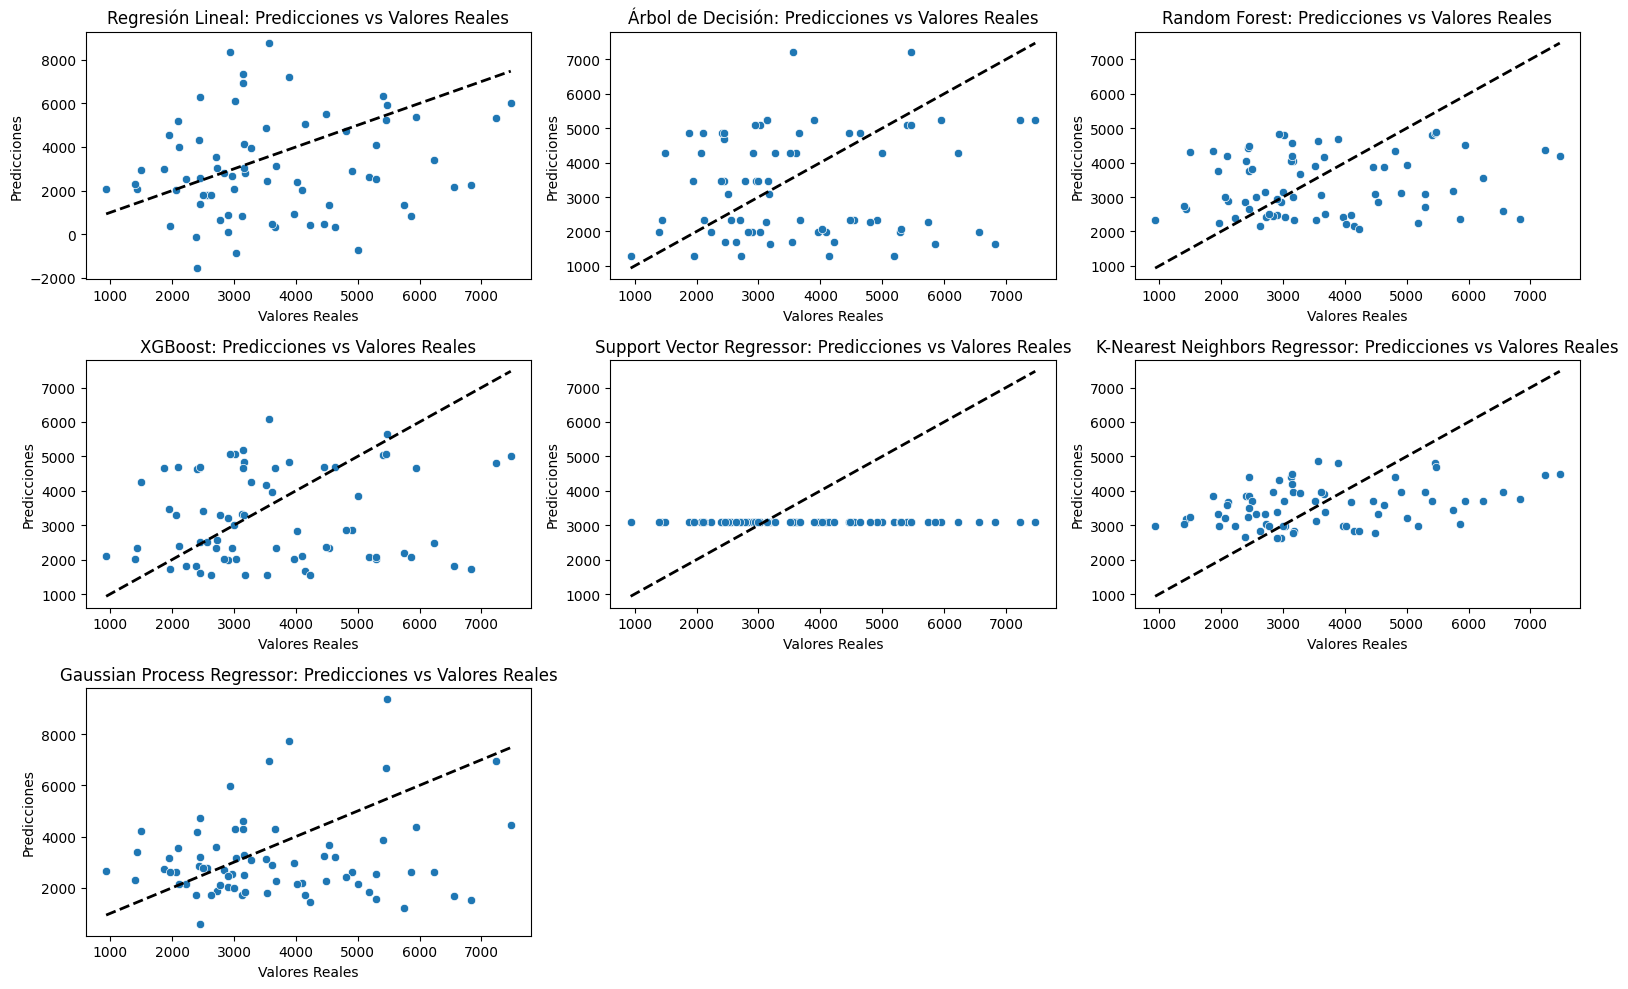

In [952]:
# Función para mostrar métricas
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Lista de modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Gaussian Process Regressor": GaussianProcessRegressor()
}

# Diccionario para almacenar las predicciones
predictions = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print_metrics(y_test, y_pred, name)

# Graficar las predicciones vs los valores reales para cada modelo
plt.figure(figsize=(16, 10))

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{name}: Predicciones vs Valores Reales')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

Como podemos apreciar en las graficas, este aproach no entrega muy buenos resultados, no predice muy bien por lo que intentaremos con otros metodos.

### Vamos a intentar con algo mas sofisticado como Redes Neuronales

In [953]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score


In [954]:
df_resampled_cleaned

Unit price  Quantity      Total  Rating Branch  \
Date                                                         
2019-01-01      659.95        81  4745.1810    79.0      A   
2019-01-02      357.08        48  1945.5030    48.4      B   
2019-01-03      475.66        37  2078.1285    64.9      A   
2019-01-04      310.46        32  1623.6885    39.1      B   
2019-01-05      739.64        55  3536.6835    89.2      A   
...                ...       ...        ...     ...    ...   
2019-03-25      474.41        42  2272.9665    68.4      A   
2019-03-26      558.64        52  1962.5130    86.1      A   
2019-03-27      568.41        45  2902.8195    67.6      A   
2019-03-28      455.25        48  2229.4020    70.5      A   
2019-03-29      530.77        54  4023.2430    55.4      B   

                      Product line  Sales_next_day  
Date                                                
2019-01-01       Sports and travel       1945.5030  
2019-01-02       Sports and travel       2078.1285  
2019-01-03       Health and beauty       1623.6885  
2019-01-04  Electronic accessories       3536.6835  
2019-01-05     Fashion accessories       3614.2050  
...                            ...             ...  
2019-03-25  Electronic accessories       1962.5130  
2019-03-26       Health and beauty       2902.8195  
2019-03-27      Food and beverages       2229.4020  
2019-03-28      Food and beverages       4023.2430  
2019-03-29       Health and beauty       4487.0595  

[88 rows x 7 columns]

Epoch 1/1000


c:\Users\mrami\anaconda3\envs\Phydata-Curso_20231119\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.2029 - val_loss: 0.3297
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1722 - val_loss: 0.3204
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1773 - val_loss: 0.3107
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1739 - val_loss: 0.3006
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1501 - val_loss: 0.2902
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1509 - val_loss: 0.2796
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1581 - val_loss: 0.2688
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1538 - val_loss: 0.2581
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1255 - val_loss: 0.2476
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1366 - val_loss: 0.2372
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1072 - val_loss: 0.2267
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1043 - val_lo

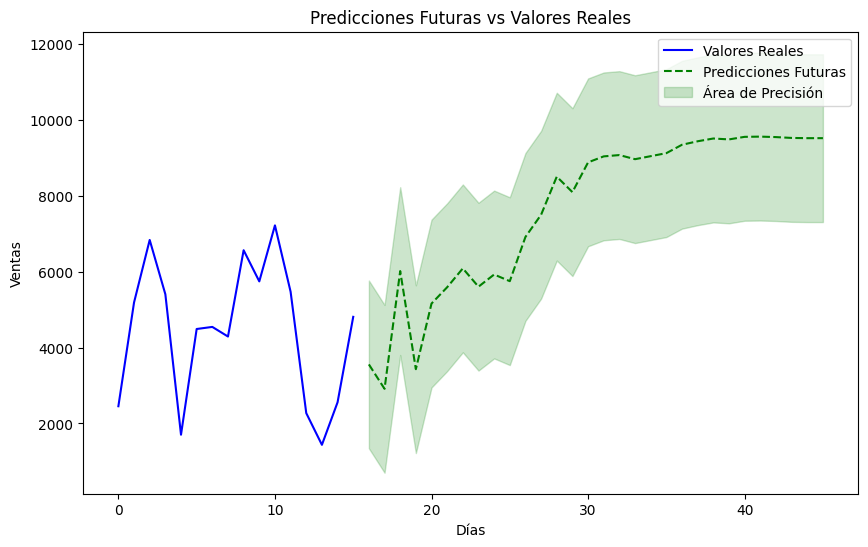

In [955]:
#usando una de 64 y luego una de 32
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Características predictoras (X) y variable objetivo (y)
X = df_resampled_cleaned#.drop(columns=['Sales_next_day','Total'])
y = df_resampled_cleaned['Sales_next_day']

# Codificación de las columnas categóricas
X = pd.get_dummies(X, drop_first=True, dtype=float)

# Escalar las características numéricas
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Escalar la variable objetivo y asegurarse de que esté en 2D
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Convertir los datos en una estructura adecuada para LSTM (3D)
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Crear secuencias
time_steps = 10  # Puedes ajustar este valor
X_lstm, y_lstm = create_sequences(X.values, y, time_steps)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Paso 3: Construcción del Modelo de Red Neuronal con LSTM de 64 unidades
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=True))  # Una única capa LSTM con 64 unidades
model.add(LSTM(32, return_sequences=False))  # Una única capa LSTM con 64 unidades
model.add(Dense(16, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='linear'))  # Capa de salida (predicción de un valor)

# Compilar el modelo
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))

# Paso 4: Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)

# Predicción de los próximos 30 días (o cualquier otro número)
def predict_future(model, last_window, n_future=30):
    future_predictions = []
    current_input = last_window

    for _ in range(n_future):
        pred = model.predict(current_input)
        future_predictions.append(pred[0])
        # Desplazar la ventana para la siguiente predicción
        current_input = np.roll(current_input, -1, axis=1)
        current_input[0, -1, :] = pred

    return np.array(future_predictions)

# Tomamos la última ventana de X_train o X_test como referencia
last_window = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

# Predecir los próximos 30 días
future_predictions = predict_future(model, last_window, n_future=30)

# Desescalar las predicciones futuras
future_predictions_descaled = scaler_y.inverse_transform(future_predictions)

# Desescalar las predicciones actuales
y_pred = model.predict(X_test)
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_descaled = scaler_y.inverse_transform(y_pred_reshaped)
y_test_descaled = scaler_y.inverse_transform(y_test_reshaped)

# Graficar las predicciones vs los valores reales (y los próximos 30 días)
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test_descaled, label='Valores Reales', color='blue')



# Graficar las predicciones futuras
future_index = range(len(y_test_descaled), len(y_test_descaled) + 30)
plt.plot(future_index, future_predictions_descaled, label='Predicciones Futuras', color='green', linestyle='--')

# Sombrar el área de error (precisión del modelo)
error_margin = np.std(y_test_descaled - y_pred_descaled)
plt.fill_between(
    future_index,
    future_predictions_descaled.flatten() - error_margin,
    future_predictions_descaled.flatten() + error_margin,
    color='green',
    alpha=0.2,
    label='Área de Precisión'
)

# Configuración del gráfico
plt.title('Predicciones Futuras vs Valores Reales')
plt.xlabel('Días')
plt.ylabel('Ventas')
plt.legend()
plt.show()



Epoch 1/1000


c:\Users\mrami\anaconda3\envs\Phydata-Curso_20231119\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.1235 - val_loss: 0.2572
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1397 - val_loss: 0.2403
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1096 - val_loss: 0.2242
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1051 - val_loss: 0.2095
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0887 - val_loss: 0.1960
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0905 - val_loss: 0.1831
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0892 - val_loss: 0.1709
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0699 - val_loss: 0.1595
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0753 - val_loss: 0.1489
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0713 - val_loss: 0.1393
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0610 - val_loss: 0.1308
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0524 - val_lo

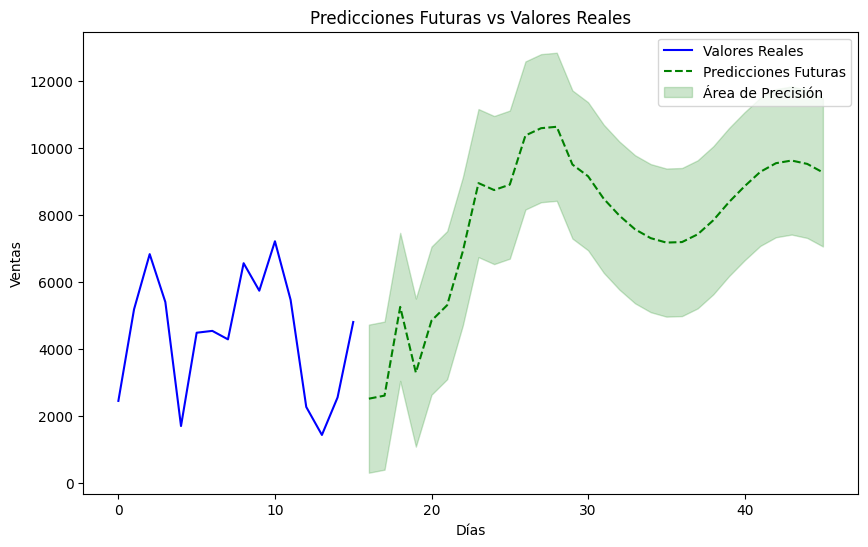

In [956]:
### usando una de 32 primero y luego una de 64

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Características predictoras (X) y variable objetivo (y)
X = df_resampled_cleaned#.drop(columns=['Sales_next_day','Total'])
y = df_resampled_cleaned['Sales_next_day']

# Codificación de las columnas categóricas
X = pd.get_dummies(X, drop_first=True, dtype=float)

# Escalar las características numéricas
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Escalar la variable objetivo y asegurarse de que esté en 2D
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Convertir los datos en una estructura adecuada para LSTM (3D)
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Crear secuencias
time_steps = 10  # Puedes ajustar este valor
X_lstm, y_lstm = create_sequences(X.values, y, time_steps)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Paso 3: Construcción del Modelo de Red Neuronal con LSTM
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, return_sequences=True))  # Primera capa LSTM con 32 unidades
model.add(LSTM(64, return_sequences=False))  # Segunda capa LSTM con 64 unidades
model.add(Dense(16, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='linear'))  # Capa de salida (predicción de un valor)

# Compilar el modelo
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))

# Paso 4: Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)

# Paso 1: Predicción de los próximos 30 días (o cualquier otro número)
def predict_future(model, last_window, n_future=30):
    future_predictions = []
    current_input = last_window

    for _ in range(n_future):
        pred = model.predict(current_input)
        future_predictions.append(pred[0])
        # Desplazar la ventana para la siguiente predicción
        current_input = np.roll(current_input, -1, axis=1)
        current_input[0, -1, :] = pred

    return np.array(future_predictions)

# Tomamos la última ventana de X_train o X_test como referencia
last_window = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

# Predecir los próximos 30 días
future_predictions = predict_future(model, last_window, n_future=30)

# Desescalar las predicciones futuras
future_predictions_descaled = scaler_y.inverse_transform(future_predictions)

# Paso 2: Graficar las predicciones vs los valores reales (y los próximos 30 días)
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test_descaled, label='Valores Reales', color='blue')



# Graficar las predicciones futuras
future_index = range(len(y_test_descaled), len(y_test_descaled) + 30)
plt.plot(future_index, future_predictions_descaled, label='Predicciones Futuras', color='green', linestyle='--')

# Sombrar el área de error (precisión del modelo)
error_margin = np.std(y_test_descaled - y_pred_descaled)
plt.fill_between(
    future_index,
    future_predictions_descaled.flatten() - error_margin,
    future_predictions_descaled.flatten() + error_margin,
    color='green',
    alpha=0.2,
    label='Área de Precisión'
)

# Configuración del gráfico
plt.title('Predicciones Futuras vs Valores Reales')
plt.xlabel('Días')
plt.ylabel('Ventas')
plt.legend()
plt.show()



Como vemos este aproach si logra reproducir predicciones futuras, pero no son lo mejor, por lo que es necesario optimizar hiperparametros, tambien se podria hacer una busqueda de la mejor combinacion de features, pero no es el scope de este trabajo

### d) Optimización de hiperparámetros:
- Es comun en este tipo de analisis realizar una búsqueda de hiperparámetros para mejorar el rendimiento del
modelo seleccionado

Reloading Tuner from tuner_results\lstm_hyperparameter_optimization\tuner0.json
Mejores hiperparámetros: {'units': 32, 'dense_units': 64, 'learning_rate': 0.001}
Epoch 1/1000


c:\Users\mrami\anaconda3\envs\Phydata-Curso_20231119\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.2488 - val_loss: 0.3530
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1663 - val_loss: 0.2927
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1524 - val_loss: 0.2422
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1054 - val_loss: 0.1949
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0737 - val_loss: 0.1493
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0569 - val_loss: 0.1109
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0483 - val_loss: 0.0892
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0522 - val_loss: 0.0847
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0604 - val_loss: 0.0842
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0600 - val_loss: 0.0858
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0531 - val_loss: 0.0924
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0527 - val_lo

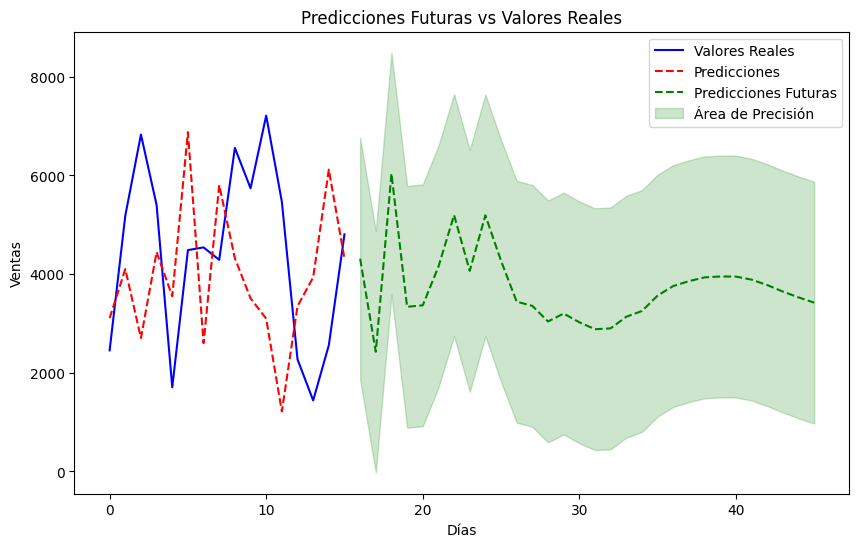

In [957]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Características predictoras (X) y variable objetivo (y)
X = df_resampled_cleaned
y = df_resampled_cleaned['Sales_next_day']

# Codificación de las columnas categóricas
X = pd.get_dummies(X, drop_first=True, dtype=float)

# Escalar las características numéricas
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Escalar la variable objetivo y asegurarse de que esté en 2D
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Convertir los datos en una estructura adecuada para LSTM (3D)
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Crear secuencias
time_steps = 10
X_lstm, y_lstm = create_sequences(X.values, y, time_steps)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Paso 1: Definir la función de construcción del modelo para la optimización
def build_model(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Optimización del número de unidades en la primera capa LSTM
    model.add(LSTM(units=hp.Int('lstm1_units', min_value=32, max_value=128, step=32), return_sequences=True))
    
    # Optimización del número de unidades en la segunda capa LSTM
    model.add(LSTM(units=hp.Int('lstm2_units', min_value=32, max_value=128, step=32), return_sequences=False))
    
    # Añadir una capa densa
    model.add(Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'))
    
    # Capa de salida
    model.add(Dense(1, activation='linear'))
    
    # Optimizar el learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss='mean_squared_error')
    
    return model

# Paso 2: Configuración de Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Número de combinaciones de hiperparámetros que probará
    executions_per_trial=2,  # Número de veces que se ejecutará cada combinación de hiperparámetros
    directory='tuner_results',
    project_name='lstm_hyperparameter_optimization'
)

# Paso 3: Realizar la búsqueda de hiperparámetros
# Aquí especificas el número de épocas (1000)
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)

# Obtener los mejores hiperparámetros
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores hiperparámetros: {best_hyperparameters.values}")

# Reconstruir el mejor modelo utilizando los mejores hiperparámetros
best_model = build_model(best_hyperparameters)

# Entrenar el mejor modelo de nuevo si es necesario
best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)

# Predicción de los próximos 30 días
def predict_future(model, last_window, n_future=30):
    future_predictions = []
    current_input = last_window

    for _ in range(n_future):
        pred = model.predict(current_input)
        future_predictions.append(pred[0])
        # Desplazar la ventana para la siguiente predicción
        current_input = np.roll(current_input, -1, axis=1)
        current_input[0, -1, :] = pred

    return np.array(future_predictions)

# Tomamos la última ventana de X_train o X_test como referencia
last_window = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

# Predecir los próximos 30 días
future_predictions = predict_future(best_model, last_window, n_future=30)

# Desescalar las predicciones futuras
future_predictions_descaled = scaler_y.inverse_transform(future_predictions)

# Desescalar las predicciones actuales
y_pred = best_model.predict(X_test)
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_descaled = scaler_y.inverse_transform(y_pred_reshaped)
y_test_descaled = scaler_y.inverse_transform(y_test_reshaped)

# Graficar las predicciones vs los valores reales (y los próximos 30 días)
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test_descaled, label='Valores Reales', color='blue')

# Graficar las predicciones actuales
plt.plot(y_pred_descaled, label='Predicciones', color='red', linestyle='--')

# Graficar las predicciones futuras
future_index = range(len(y_test_descaled), len(y_test_descaled) + 30)
plt.plot(future_index, future_predictions_descaled, label='Predicciones Futuras', color='green', linestyle='--')

# Sombrar el área de error (precisión del modelo)
error_margin = np.std(y_test_descaled - y_pred_descaled)
plt.fill_between(
    future_index,
    future_predictions_descaled.flatten() - error_margin,
    future_predictions_descaled.flatten() + error_margin,
    color='green',
    alpha=0.2,
    label='Área de Precisión'
)

# Configuración del gráfico
plt.title('Predicciones Futuras vs Valores Reales')
plt.xlabel('Días')
plt.ylabel('Ventas')
plt.legend()
plt.show()



 ### Resumen Optimizacion
 Usamos una red neuronal con capas LSTM (Long Short-Term Memory) para predecir las ventas futuras en base a datos históricos. Las capas LSTM son útiles para series temporales porque pueden aprender patrones secuenciales a largo plazo en los datos.

1. Preprocesamiento de los datos
- Primero, convertimos las variables categóricas en valores numéricos usando pd.get_dummies().
- Luego, escalamos las características numéricas (como el precio, cantidad, etc.) y las ventas (Sales_next_day) para asegurarnos de que todas las variables estén en la misma escala. Esto es importante para que el modelo LSTM entrene correctamente.
- Finalmente, organizamos los datos en "ventanas de tiempo" para que el modelo LSTM pueda aprender la secuencia de días. Cada ventana contiene los datos de varios días consecutivos.
2. Construcción del modelo LSTM
- Definimos un modelo con una capa LSTM de 64 unidades. Las capas LSTM son especiales porque pueden "recordar" información de los pasos anteriores.
- Añadimos una capa oculta densa de 16 unidades con activación relu para capturar relaciones no lineales.
- La salida final es una capa densa con una sola neurona para predecir las ventas del día siguiente.
3. Optimización de hiperparámetros
- Utilizamos Keras Tuner para optimizar automáticamente los hiperparámetros del modelo, como el número de unidades en las capas LSTM, el número de unidades en la capa densa, y la tasa de aprendizaje.
- El proceso de optimización prueba varias combinaciones de hiperparámetros y selecciona la mejor en base al rendimiento en el conjunto de validación.
4. Predicción de ventas futuras
- Una vez entrenado el modelo, utilizamos la última ventana de datos para predecir las ventas de los próximos 30 días.
- Además, graficamos las predicciones futuras junto con los valores reales para comparar el rendimiento del modelo.
5. Visualización de resultados
- La gráfica muestra las ventas reales frente a las predicciones del modelo para el conjunto de prueba. También incluimos una predicción para los próximos 30 días, sombreando el área de incertidumbre con base en el margen de error del modelo.
- Este enfoque permite ajustar el modelo de manera eficiente, mejorar su precisión y realizar predicciones futuras de ventas basadas en los datos históricos.